# Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [ ]:
url = "https://drive.google.com/file/d/1mHGyC83Bi_9ffvGoV7MRihOben6pN-Xa/view?usp=sharing"
file_id = url.split("/")[-2]
download_url = f"https://drive.google.com/uc?id={file_id}"

In [ ]:
df = pd.read_csv(download_url)
df.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
5,MO,147,area_code_415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
6,LA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no
7,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no
8,IN,65,area_code_415,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,yes
9,RI,74,area_code_415,no,no,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,no


# Exploratory Data Analysis

## Data Overview

In [ ]:
df.shape

(4250, 20)

In [ ]:
list_feature = []
for col in df:
    list_feature.append([col, df[col].dtype, df[col].isna().sum(), df[col].nunique(),df[col].unique()[:5]])

df_info = pd.DataFrame(data=list_feature, columns='colums, datatype, null_values, unique_values, unique_sample'.split(","))
df_info

,colums,datatype,null_values,unique_values,unique_sample
0,state,object,0,51,"[OH, NJ, OK, MA, MO]"
1,account_length,int64,0,215,"[107, 137, 84, 75, 121]"
2,area_code,object,0,3,"[area_code_415, area_code_408, area_code_510]"
3,international_plan,object,0,2,"[no, yes]"
4,voice_mail_plan,object,0,2,"[yes, no]"
5,number_vmail_messages,int64,0,46,"[26, 0, 24, 37, 27]"
6,total_day_minutes,float64,0,1843,"[161.6, 243.4, 299.4, 166.7, 218.2]"
7,total_day_calls,int64,0,120,"[123, 114, 71, 113, 88]"
8,total_day_charge,float64,0,1843,"[27.47, 41.38, 50.9, 28.34, 37.09]"
9,total_eve_minutes,float64,0,1773,"[195.5, 121.2, 61.9, 148.3, 348.5]"


In [ ]:
numeric = [col for col in df.columns if df[col].dtype != object]
categorical = [col for col in df.columns if df[col].dtype == object]

print("Numeric features:", numeric)
print("Categorical features:", categorical)
print(f"Total numeric features: {len(numeric)}")
print(f"Total categorical features: {len(categorical)}")

Numeric features: ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']
Categorical features: ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']
Total numeric features: 15
Total categorical features: 5


In [ ]:
df.duplicated().sum()

0

# Statistical Summary

In [ ]:
df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236,39.698,1.0,73.000,100.00,127.000,243.00
number_vmail_messages,4250.0,7.632,13.440,0.0,0.000,0.00,16.000,52.00
total_day_minutes,4250.0,180.260,54.012,0.0,143.325,180.45,216.200,351.50
total_day_calls,4250.0,99.907,19.851,0.0,87.000,100.00,113.000,165.00
total_day_charge,4250.0,30.645,9.182,0.0,24.365,30.68,36.750,59.76
total_eve_minutes,4250.0,200.174,50.250,0.0,165.925,200.70,233.775,359.30
total_eve_calls,4250.0,100.176,19.909,0.0,87.000,100.00,114.000,170.00
total_eve_charge,4250.0,17.015,4.271,0.0,14.102,17.06,19.868,30.54
total_night_minutes,4250.0,200.528,50.354,0.0,167.225,200.45,234.700,395.00
total_night_calls,4250.0,99.840,20.093,0.0,86.000,100.00,113.000,175.00


In [ ]:
df.describe(include=['object']).T

,count,unique,top,freq
state,4250,51,WV,139
area_code,4250,3,area_code_415,2108
international_plan,4250,2,no,3854
voice_mail_plan,4250,2,no,3138
churn,4250,2,no,3652


# Feature Analysis

## Exploratory Data Analysis

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
counts = df['churn'].value_counts()
counts

no     3652
yes     598
Name: churn, dtype: int64

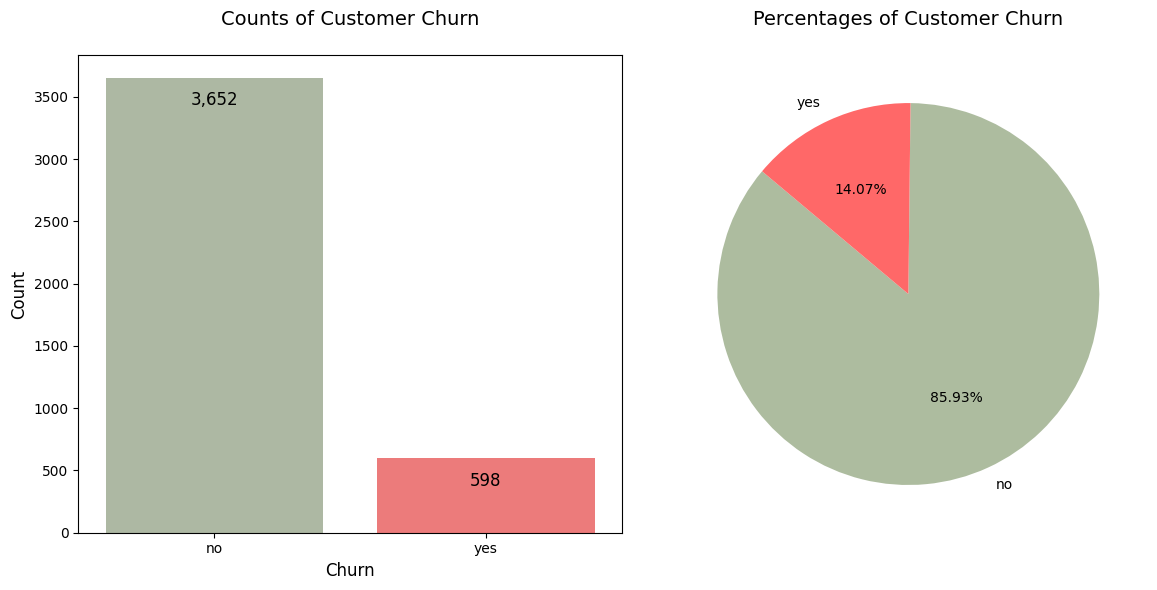

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
ax = sns.barplot(x=counts.index, y=counts, palette=['#ADBC9F' , '#FF6868'])
for i, v in enumerate(counts):
    bar_height = ax.patches[i].get_height()
    text_pos = bar_height - 180
    ax.text(i, text_pos, f'{v:,}', ha='center', va='center', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Churn', fontsize=12)
plt.title('Counts of Customer Churn\n', fontsize=14)

percentages = counts / counts.sum() * 100

plt.subplot(1, 2, 2)
plt.pie(percentages, labels=percentages.index, autopct='%1.2f%%', colors=['#ADBC9F' , '#FF6868'], startangle=140)
plt.title('Percentages of Customer Churn\n', fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
state_counts = df.groupby(['state', 'churn'])['account_length'].count().reset_index()
state_counts['ratio'] = state_counts.groupby('state')['account_length'].apply(lambda x: round(x / x.sum() * 100, 0)).astype(int)
state_counts = state_counts[['state', 'churn','account_length', 'ratio']]
state_counts

,state,churn,account_length,ratio
0,AK,no,57,93
1,AK,yes,4,7
2,AL,no,88,87
3,AL,yes,13,13
4,AR,no,60,85
...,...,...,...,...
97,WI,yes,7,7
98,WV,no,120,86
99,WV,yes,19,14
100,WY,no,85,89


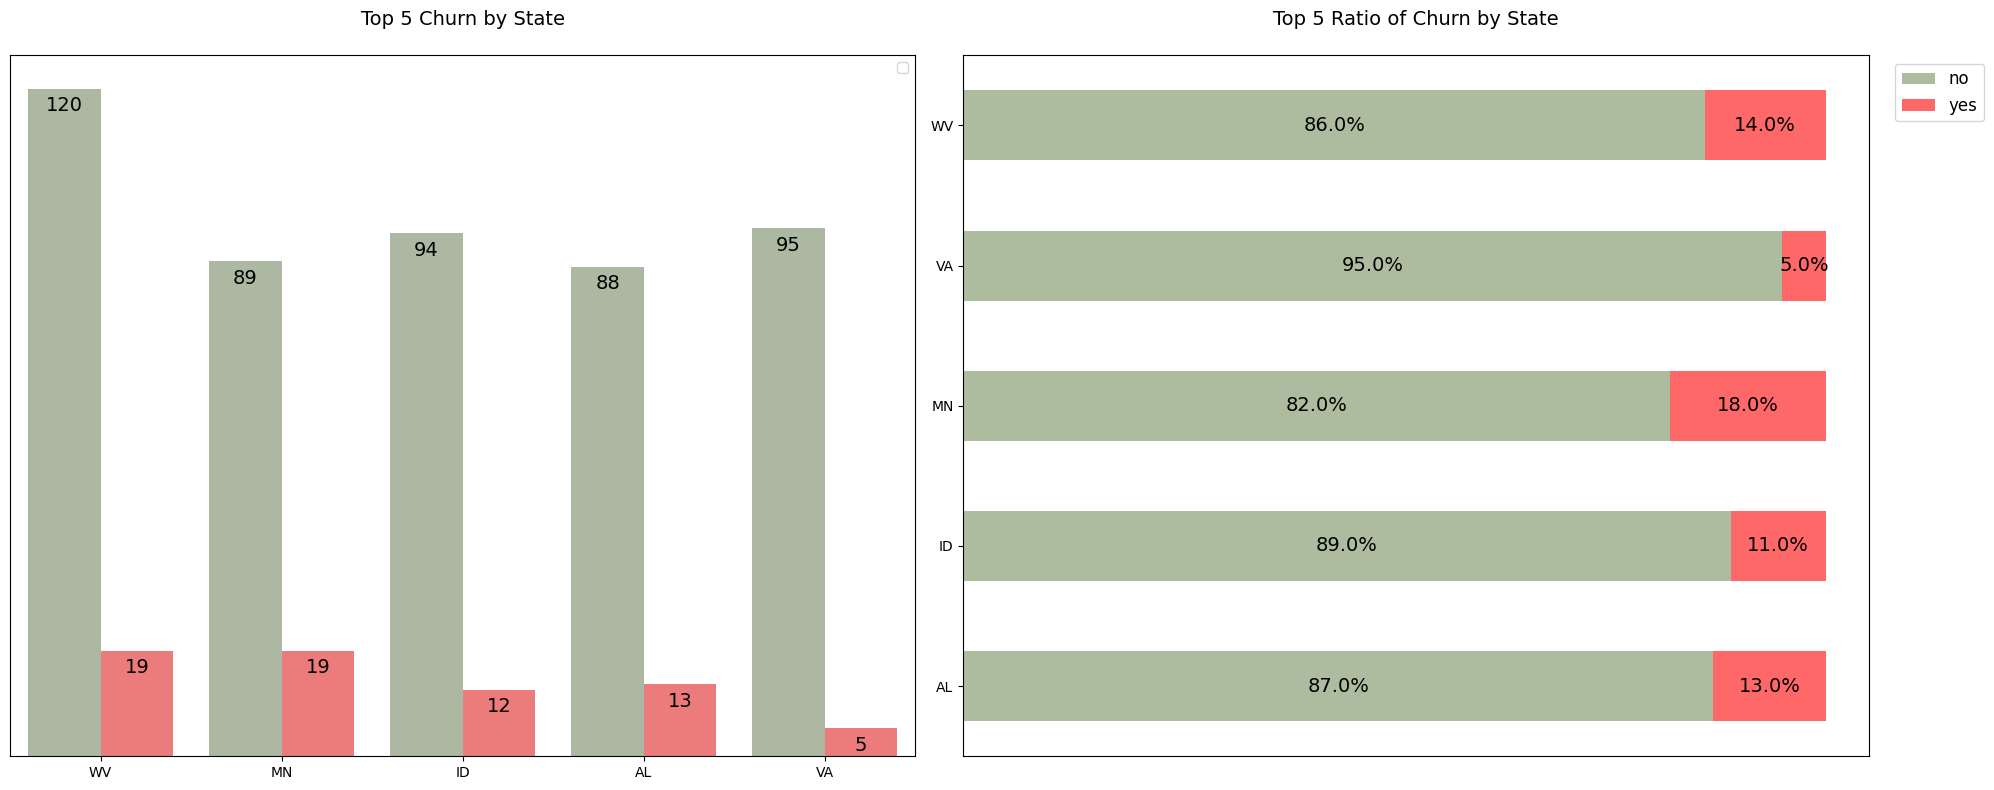

In [ ]:
top_states = state_counts.groupby('state')['account_length'].sum().nlargest(5).index
state_counts_top = state_counts[state_counts['state'].isin(top_states)]

fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].set_title('Top 5 Churn by State\n', fontsize=14)
sns.countplot(x='state', data=df, hue='churn', palette=['#ADBC9F', '#FF6868'], order=top_states, ax=ax[0])
for i, container in enumerate(ax[0].containers):
    for bar in container:
        bar_height = bar.get_height()
        text_pos = bar_height - 3.1
        ax[0].annotate(f'{int(bar_height):,}', (bar.get_x() + bar.get_width() / 2, text_pos), ha='center', va='center', fontsize=14)
ax[0].set_yticks([])
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend([])

ax[1].set_title('Top 5 Ratio of Churn by State\n', fontsize=14)
state_counts_top.pivot(index='state', columns='churn', values='ratio').plot(kind='barh', stacked=True, color=['#ADBC9F', '#FF6868'], ax=ax[1])
for p in ax[1].patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width != 0:
        ax[1].annotate((str(round(width, 2))+'%'), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=14)
ax[1].set_xticks([])
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize='12')

plt.tight_layout()
plt.show()


In [ ]:
area_counts = df.groupby(['area_code', 'churn'])['account_length'].count().reset_index()
area_counts['ratio'] = area_counts.groupby('area_code')['account_length'].apply(lambda x: round(x / x.sum() * 100, 0)).astype(int)
area_counts = area_counts[['area_code', 'churn','account_length', 'ratio']]
area_counts

,area_code,churn,account_length,ratio
0,area_code_408,no,934,86
1,area_code_408,yes,152,14
2,area_code_415,no,1821,86
3,area_code_415,yes,287,14
4,area_code_510,no,897,85
5,area_code_510,yes,159,15


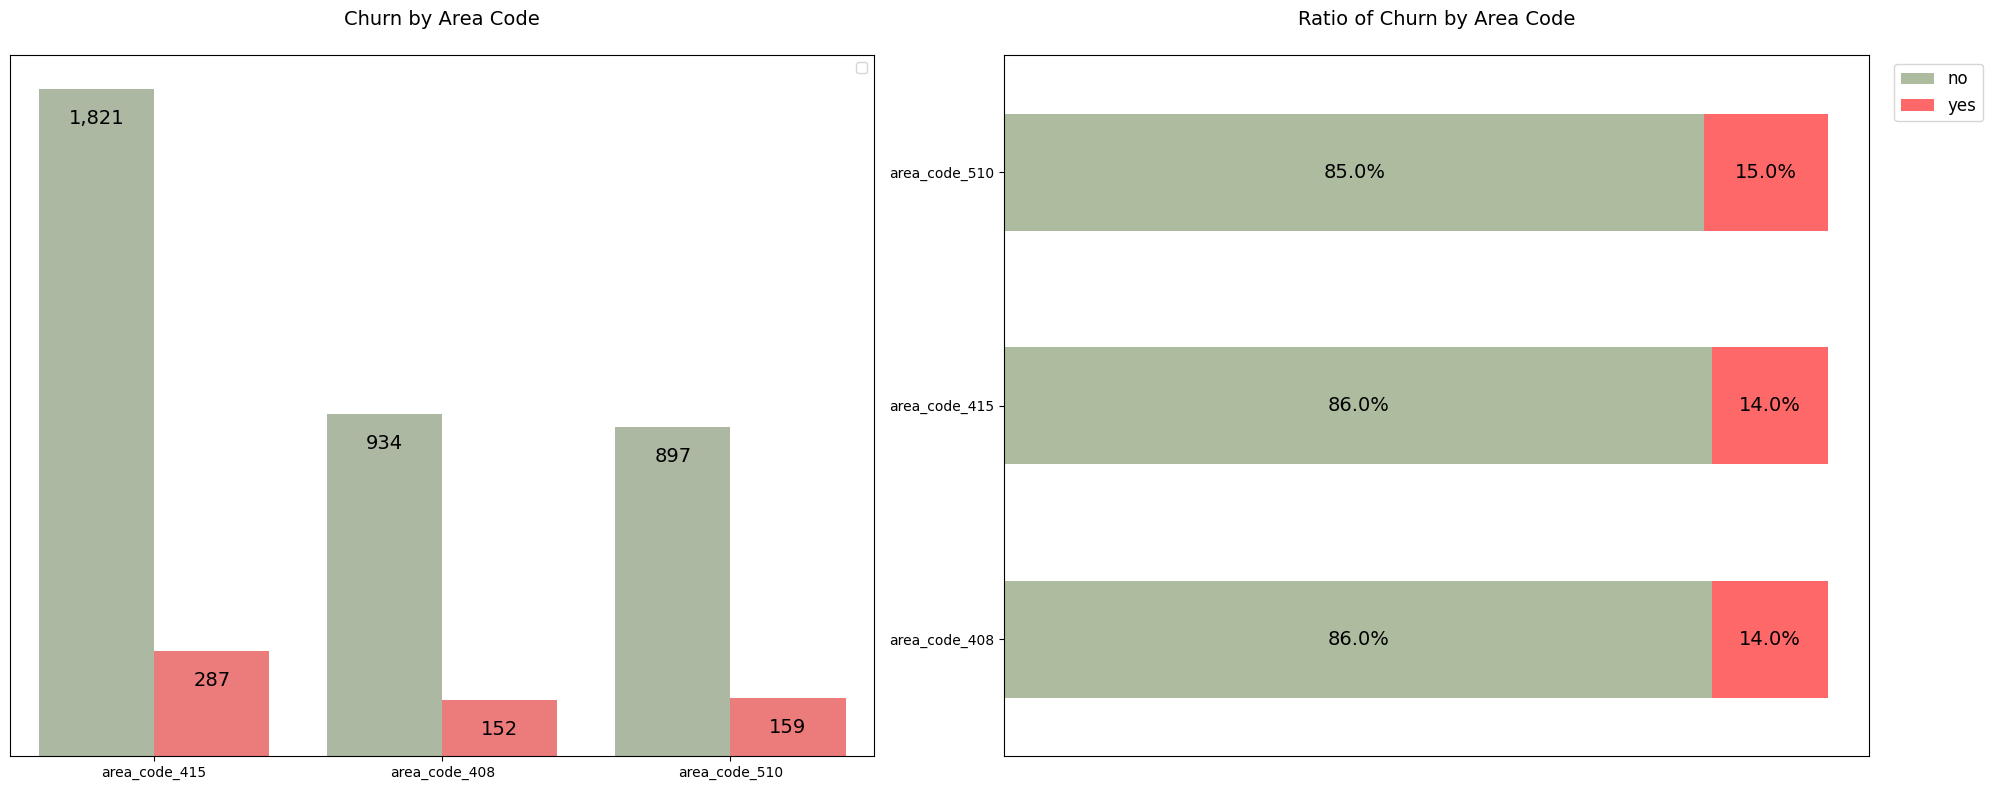

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].set_title('Churn by Area Code\n', fontsize=14)
sns.countplot(x='area_code', data=df, hue='churn', palette=['#ADBC9F', '#FF6868'], ax=ax[0])
for i, container in enumerate(ax[0].containers):
    for bar in container:
        bar_height = bar.get_height()
        text_pos = bar_height - 80
        ax[0].annotate(f'{int(bar_height):,}', (bar.get_x() + bar.get_width() / 2, text_pos), ha='center', va='center', fontsize=14)
ax[0].set_yticks([])
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend([])

ax[1].set_title('Ratio of Churn by Area Code\n', fontsize=14)
area_counts.pivot(index='area_code', columns='churn', values='ratio').plot(kind='barh', stacked=True, color=['#ADBC9F', '#FF6868'], ax=ax[1])
for p in ax[1].patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width != 0:
        ax[1].annotate((str(round(width, 2))+'%'), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=14)
ax[1].set_xticks([])
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize='12')

plt.tight_layout()
plt.show()


In [ ]:
international_plan_counts = df.groupby(['international_plan', 'churn'])['account_length'].count().reset_index()
international_plan_counts['ratio'] = international_plan_counts.groupby('international_plan')['account_length'].apply(lambda x: round(x / x.sum() * 100, 0)).astype(int)
international_plan_counts = international_plan_counts[['international_plan', 'churn','account_length', 'ratio']]
international_plan_counts

,international_plan,churn,account_length,ratio
0,no,no,3423,89
1,no,yes,431,11
2,yes,no,229,58
3,yes,yes,167,42


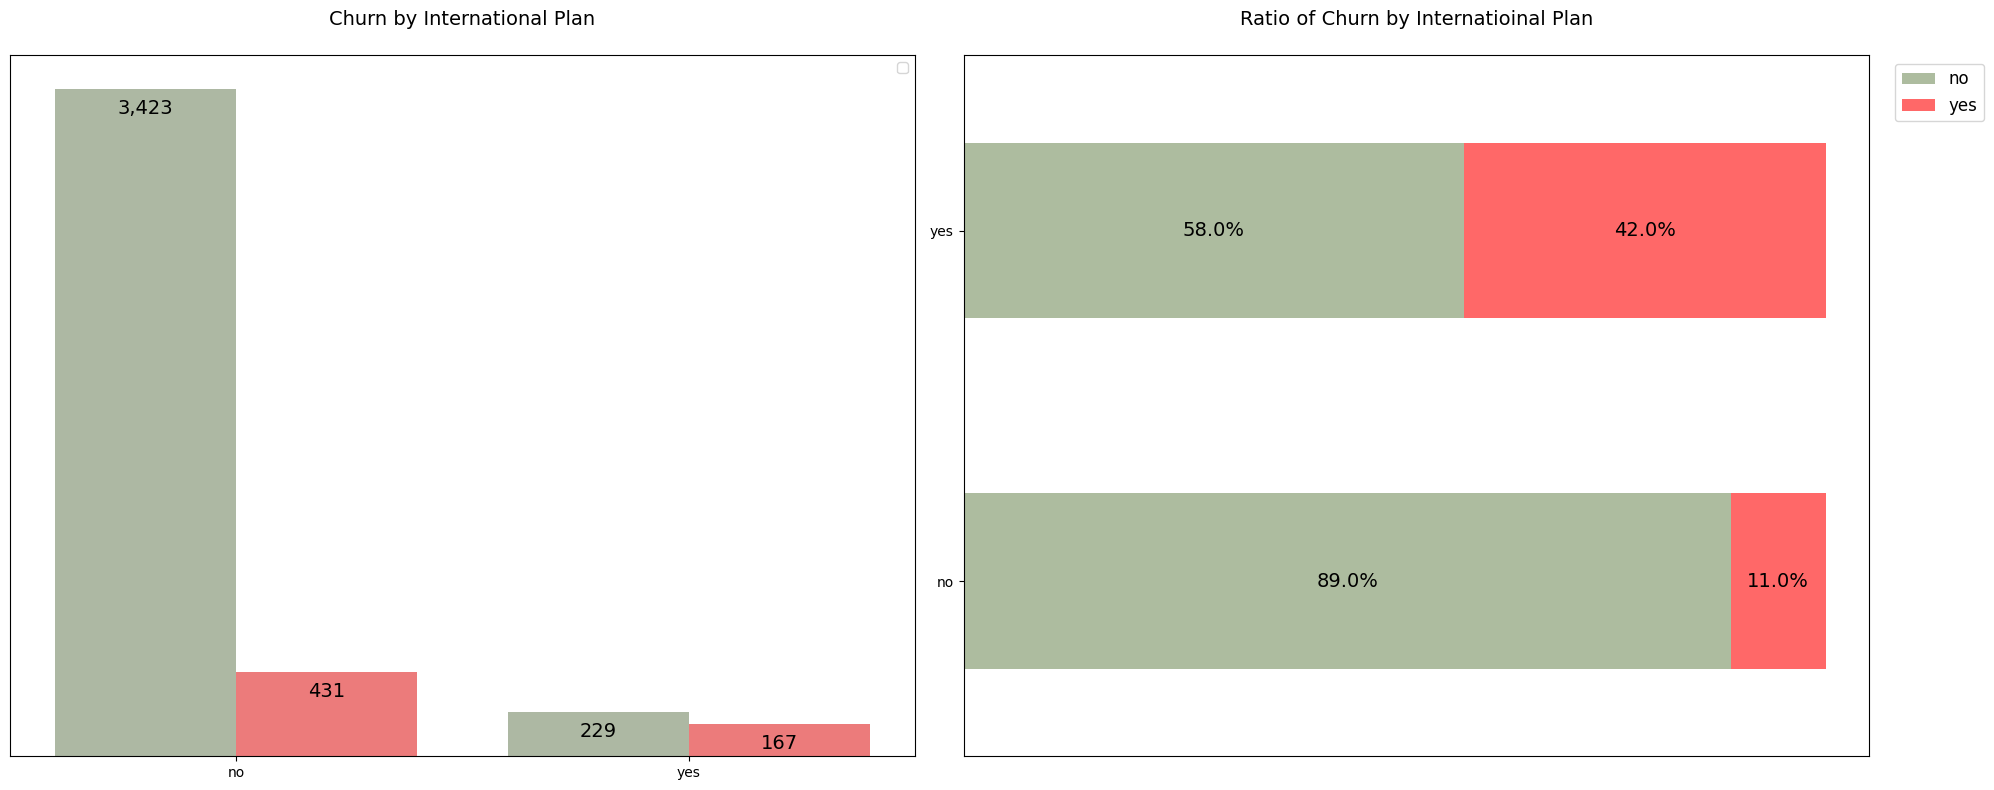

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].set_title('Churn by International Plan\n', fontsize=14)
sns.countplot(x='international_plan', data=df, hue='churn', palette=['#ADBC9F', '#FF6868'], ax=ax[0])
for i, container in enumerate(ax[0].containers):
    for bar in container:
        bar_height = bar.get_height()
        text_pos = bar_height - 100
        ax[0].annotate(f'{int(bar_height):,}', (bar.get_x() + bar.get_width() / 2, text_pos), ha='center', va='center', fontsize=14)
ax[0].set_yticks([])
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend([])

ax[1].set_title('Ratio of Churn by Internatioinal Plan\n', fontsize=14)
international_plan_counts.pivot(index='international_plan', columns='churn', values='ratio').plot(kind='barh', stacked=True, color=['#ADBC9F', '#FF6868'], ax=ax[1])
for p in ax[1].patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width != 0:
        ax[1].annotate((str(round(width, 2))+'%'), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=14)
ax[1].set_xticks([])
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize='12')

plt.tight_layout()
plt.show()

In [ ]:
voice_mail_plan_counts = df.groupby(['voice_mail_plan', 'churn'])['account_length'].count().reset_index()
voice_mail_plan_counts['ratio'] = voice_mail_plan_counts.groupby('voice_mail_plan')['account_length'].apply(lambda x: round(x / x.sum() * 100, 0)).astype(int)
voice_mail_plan_counts = voice_mail_plan_counts[['voice_mail_plan', 'churn','account_length', 'ratio']]
voice_mail_plan_counts

,voice_mail_plan,churn,account_length,ratio
0,no,no,2622,84
1,no,yes,516,16
2,yes,no,1030,93
3,yes,yes,82,7


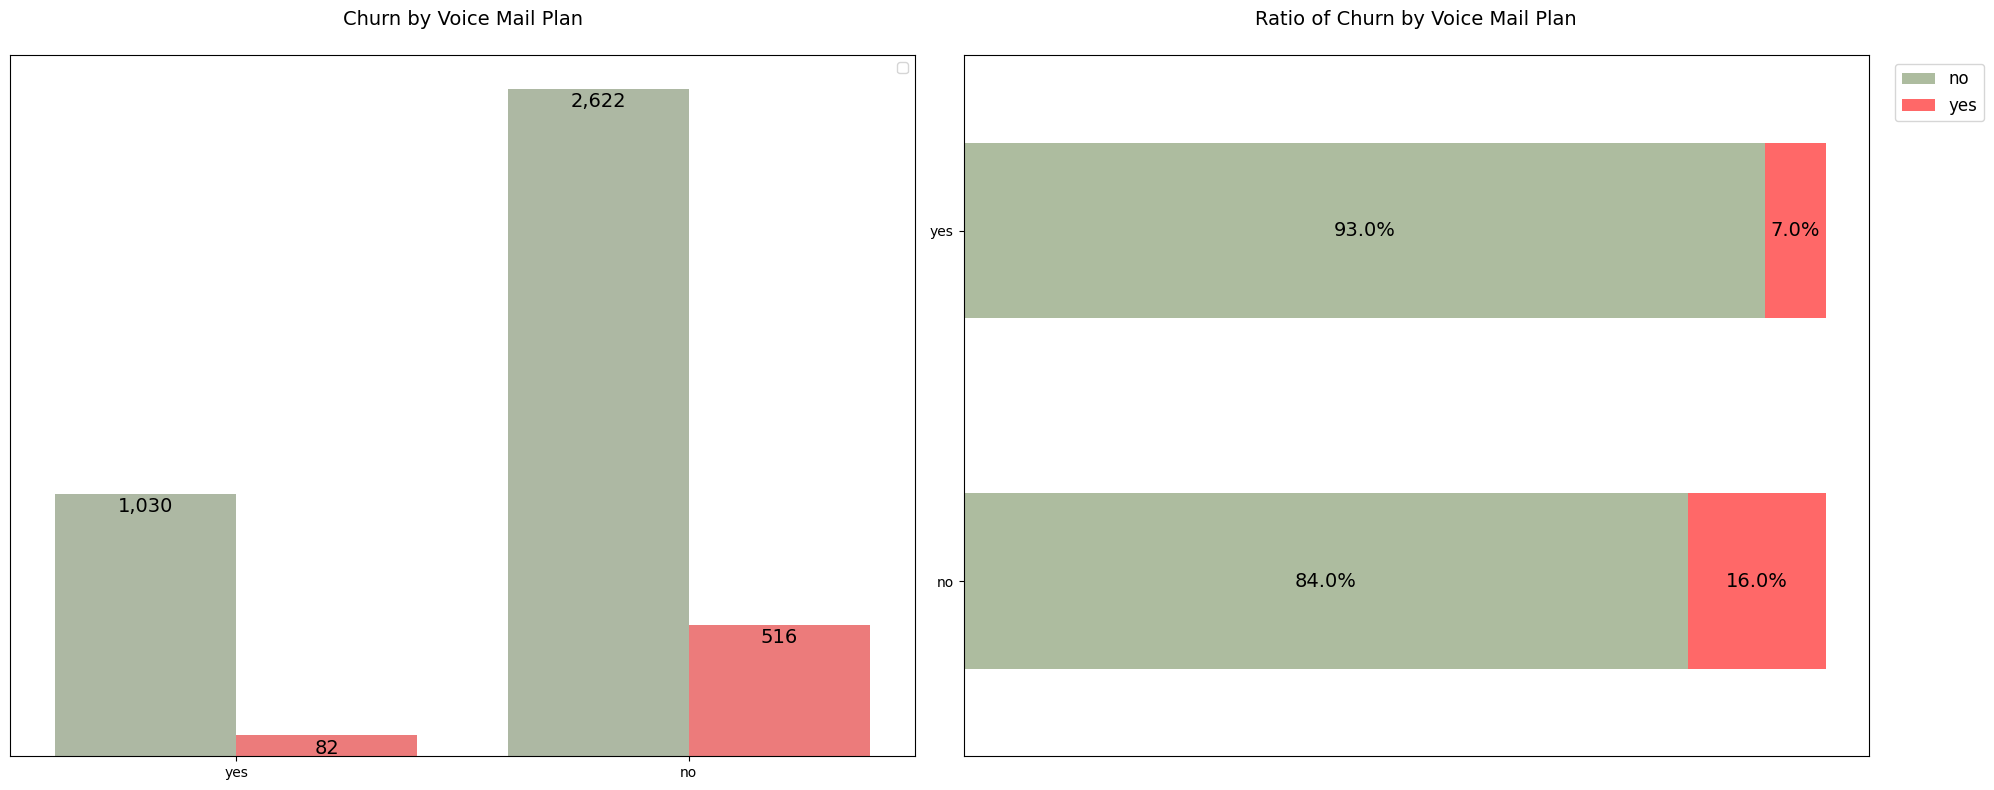

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].set_title('Churn by Voice Mail Plan\n', fontsize=14)
sns.countplot(x='voice_mail_plan', data=df, hue='churn', palette=['#ADBC9F', '#FF6868'], ax=ax[0])
for i, container in enumerate(ax[0].containers):
    for bar in container:
        bar_height = bar.get_height()
        text_pos = bar_height - 50
        ax[0].annotate(f'{int(bar_height):,}', (bar.get_x() + bar.get_width() / 2, text_pos), ha='center', va='center', fontsize=14)
ax[0].set_yticks([])
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend([])

ax[1].set_title('Ratio of Churn by Voice Mail Plan\n', fontsize=14)
voice_mail_plan_counts.pivot(index='voice_mail_plan', columns='churn', values='ratio').plot(kind='barh', stacked=True, color=['#ADBC9F', '#FF6868'], ax=ax[1])
for p in ax[1].patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width != 0:
        ax[1].annotate((str(round(width, 2))+'%'), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=14)
ax[1].set_xticks([])
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize='12')

plt.tight_layout()
plt.show()

In [ ]:
average_charge_per_minute_day = df['total_day_charge'].mean() / df['total_day_minutes'].mean()
average_minutes_per_call_day = df['total_day_minutes'].mean() / df['total_day_calls'].mean()
average_charge_per_minute_evening = df['total_eve_charge'].mean() / df['total_eve_minutes'].mean()
average_minutes_per_call_evening = df['total_eve_minutes'].mean() / df['total_eve_calls'].mean()
average_charge_per_minute_night = df['total_night_charge'].mean() / df['total_night_minutes'].mean()
average_minutes_per_call_night = df['total_night_minutes'].mean() / df['total_night_calls'].mean()
average_charge_per_minute_international = df['total_intl_charge'].mean() / df['total_intl_minutes'].mean()
average_minutes_per_call_international = df['total_intl_minutes'].mean() / df['total_intl_calls'].mean()

categories = ['Day', 'Evening', 'Night', 'International']

charge_per_minute_values = [average_charge_per_minute_day, average_charge_per_minute_evening, average_charge_per_minute_night, average_charge_per_minute_international]
minutes_per_call_values = [average_minutes_per_call_day, average_minutes_per_call_evening, average_minutes_per_call_night, average_minutes_per_call_international]

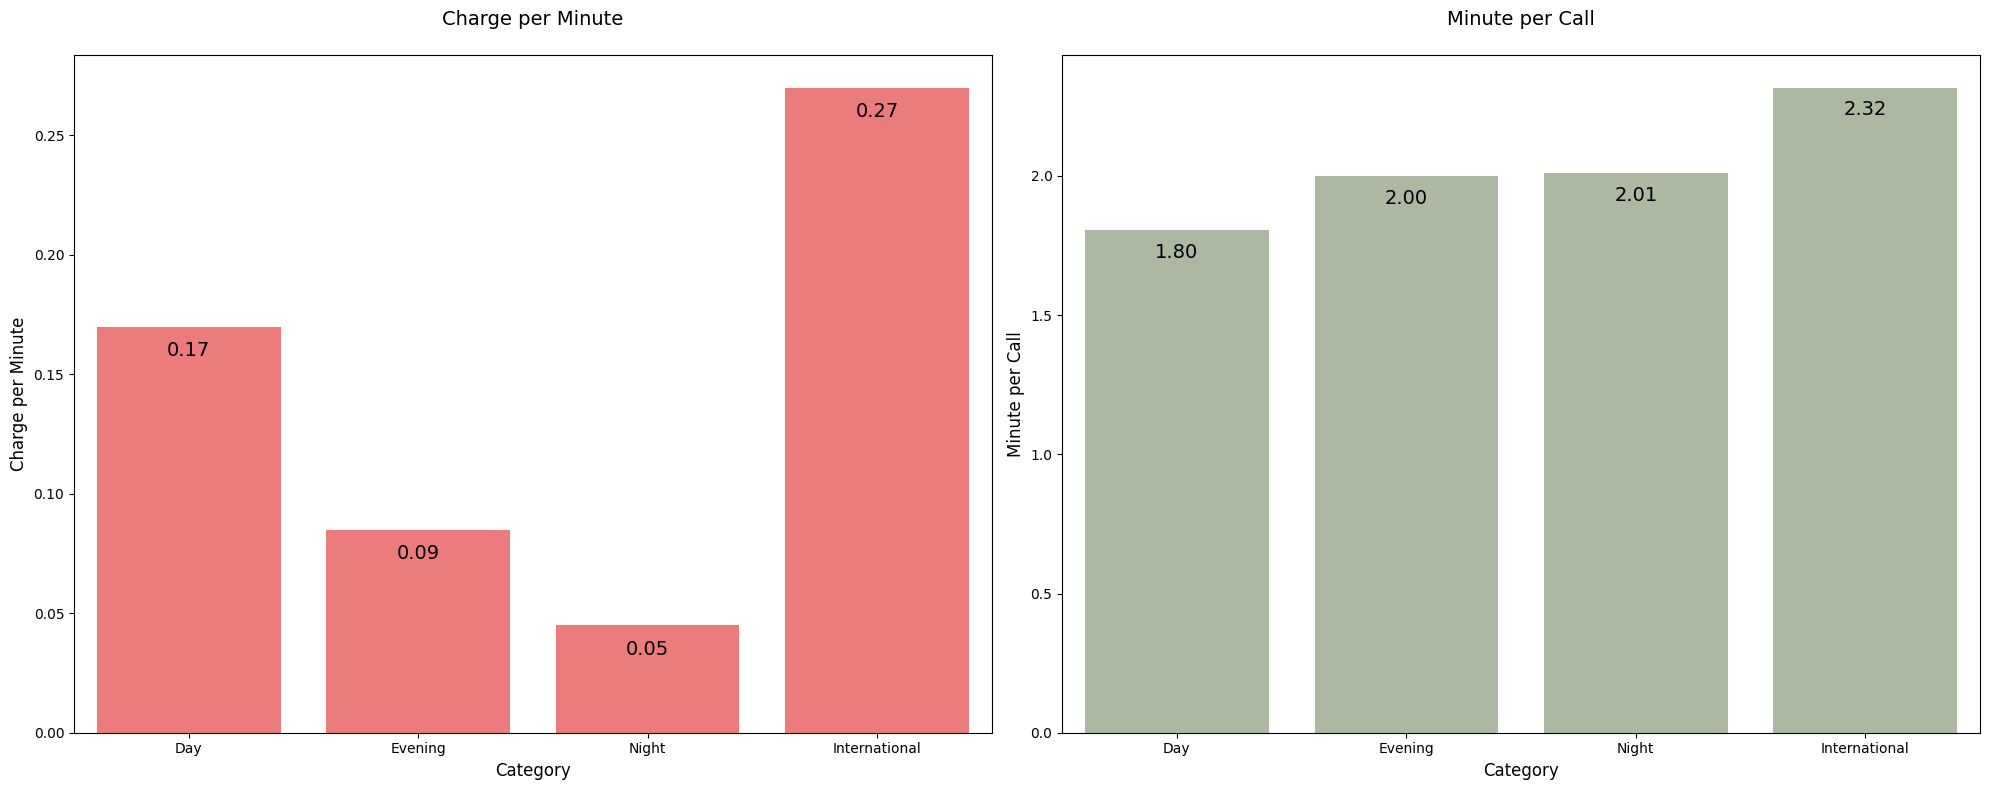

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].set_title('Charge per Minute\n', fontsize=14)
sns.barplot(x=categories, y=charge_per_minute_values, palette=['#FF6868'], ax=ax[0])
for i, container in enumerate(ax[0].containers):
    for bar in container:
        bar_height = bar.get_height()
        text_pos = bar_height - 0.01
        ax[0].annotate(f'{bar_height:.2f}', (bar.get_x() + bar.get_width() / 2, text_pos), ha='center', va='center', fontsize=14)
ax[0].set_xlabel('Category', fontsize=12)
ax[0].set_ylabel('Charge per Minute', fontsize=12)

ax[1].set_title('Minute per Call\n', fontsize=14)
sns.barplot(x=categories, y=minutes_per_call_values, palette=['#ADBC9F'], ax=ax[1])
for i, container in enumerate(ax[1].containers):
    for bar in container:
        bar_height = bar.get_height()
        text_pos = bar_height - 0.08
        ax[1].annotate(f'{bar_height:.2f}', (bar.get_x() + bar.get_width() / 2, text_pos), ha='center', va='center', fontsize=14)
ax[1].set_xlabel('Category', fontsize=12)
ax[1].set_ylabel('Minute per Call', fontsize=12)

plt.tight_layout()
plt.show()


## Univariate Analysis

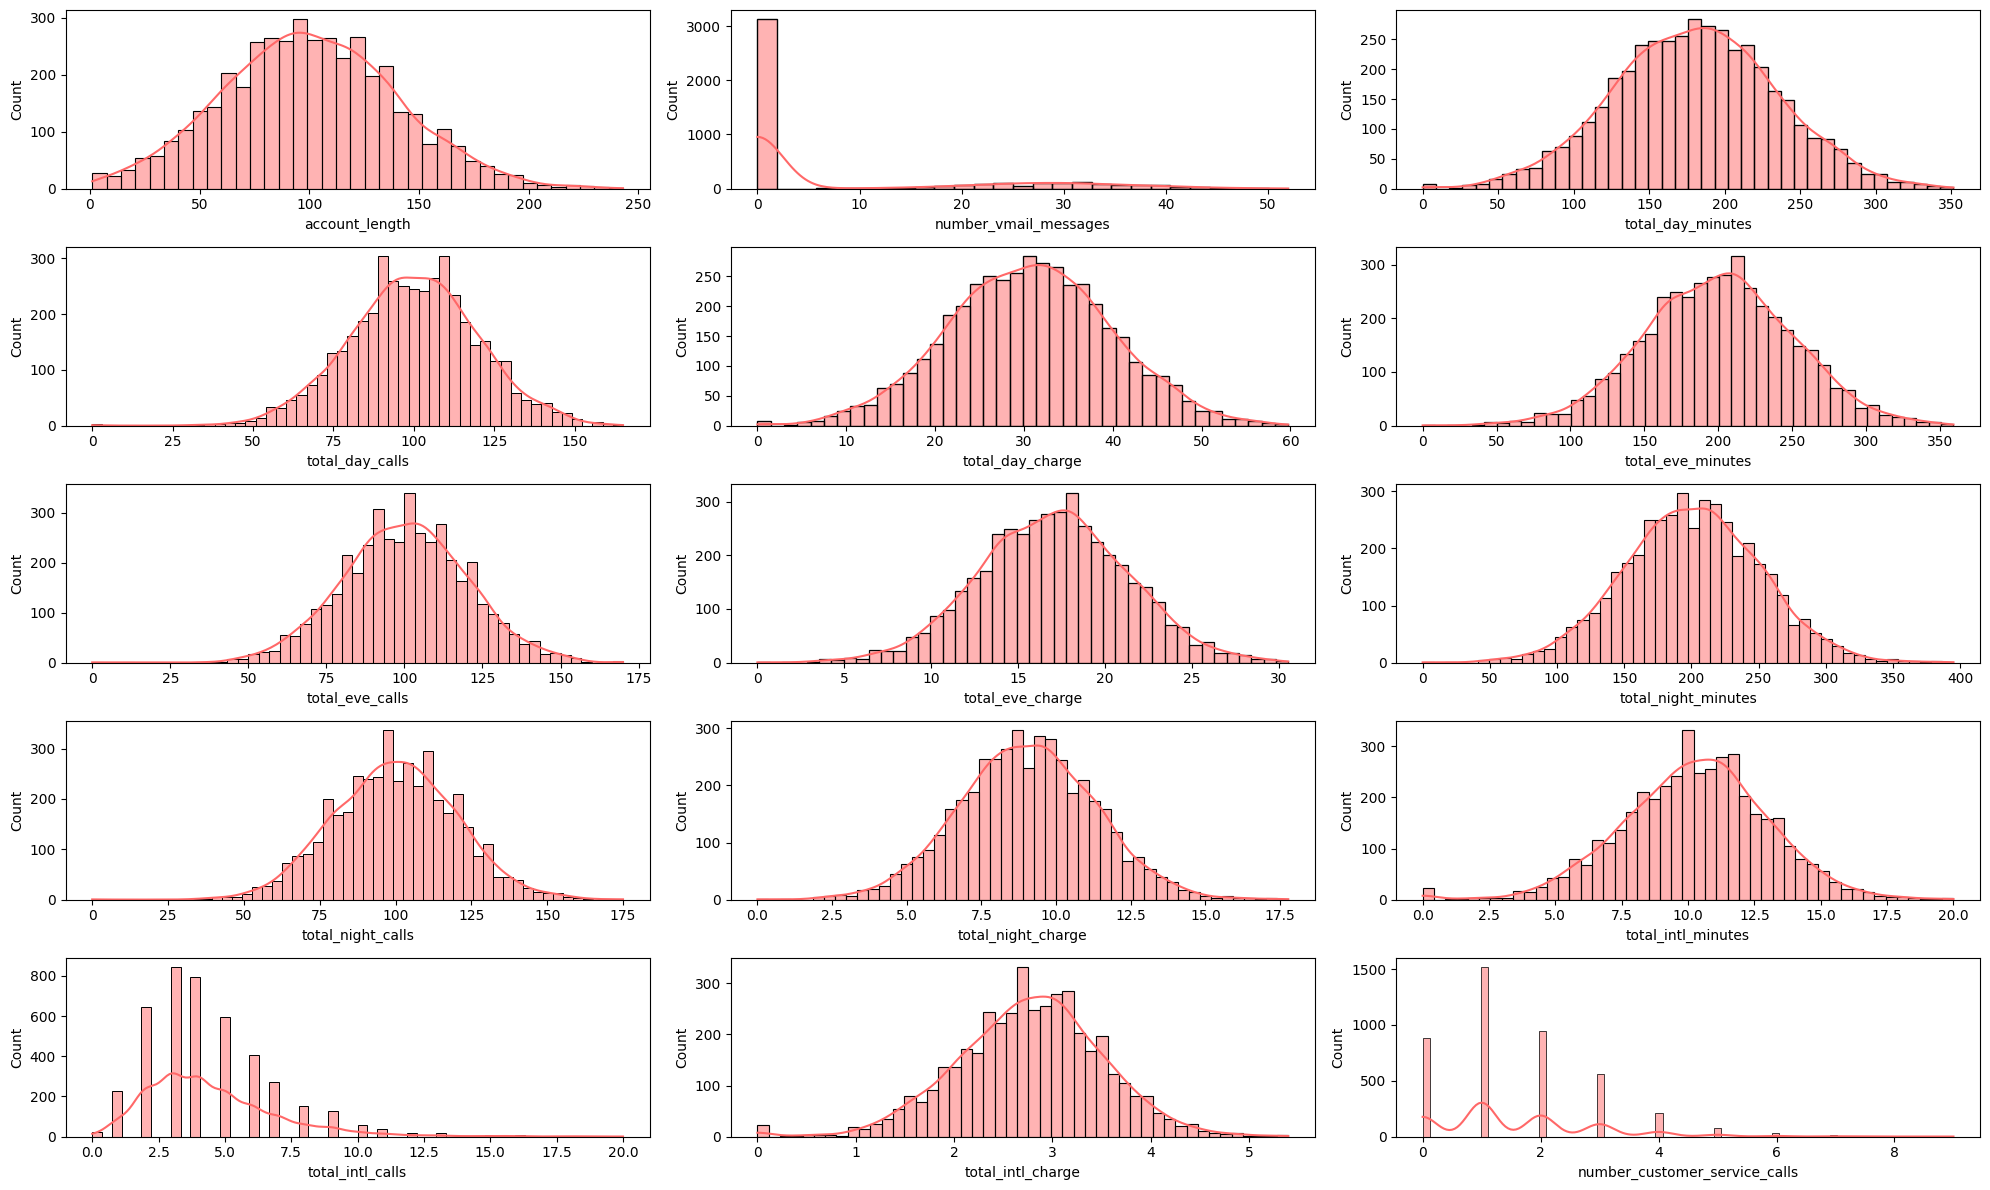

In [ ]:
plt.figure(figsize=(20, 12))
for i in range(1, len(numeric) + 1):
    plt.subplot(5, 3, i)
    sns.histplot(df[numeric[i - 1]], color='#FF6868', kde=True)
    plt.tight_layout()

plt.show()

## Bivariate Analysis

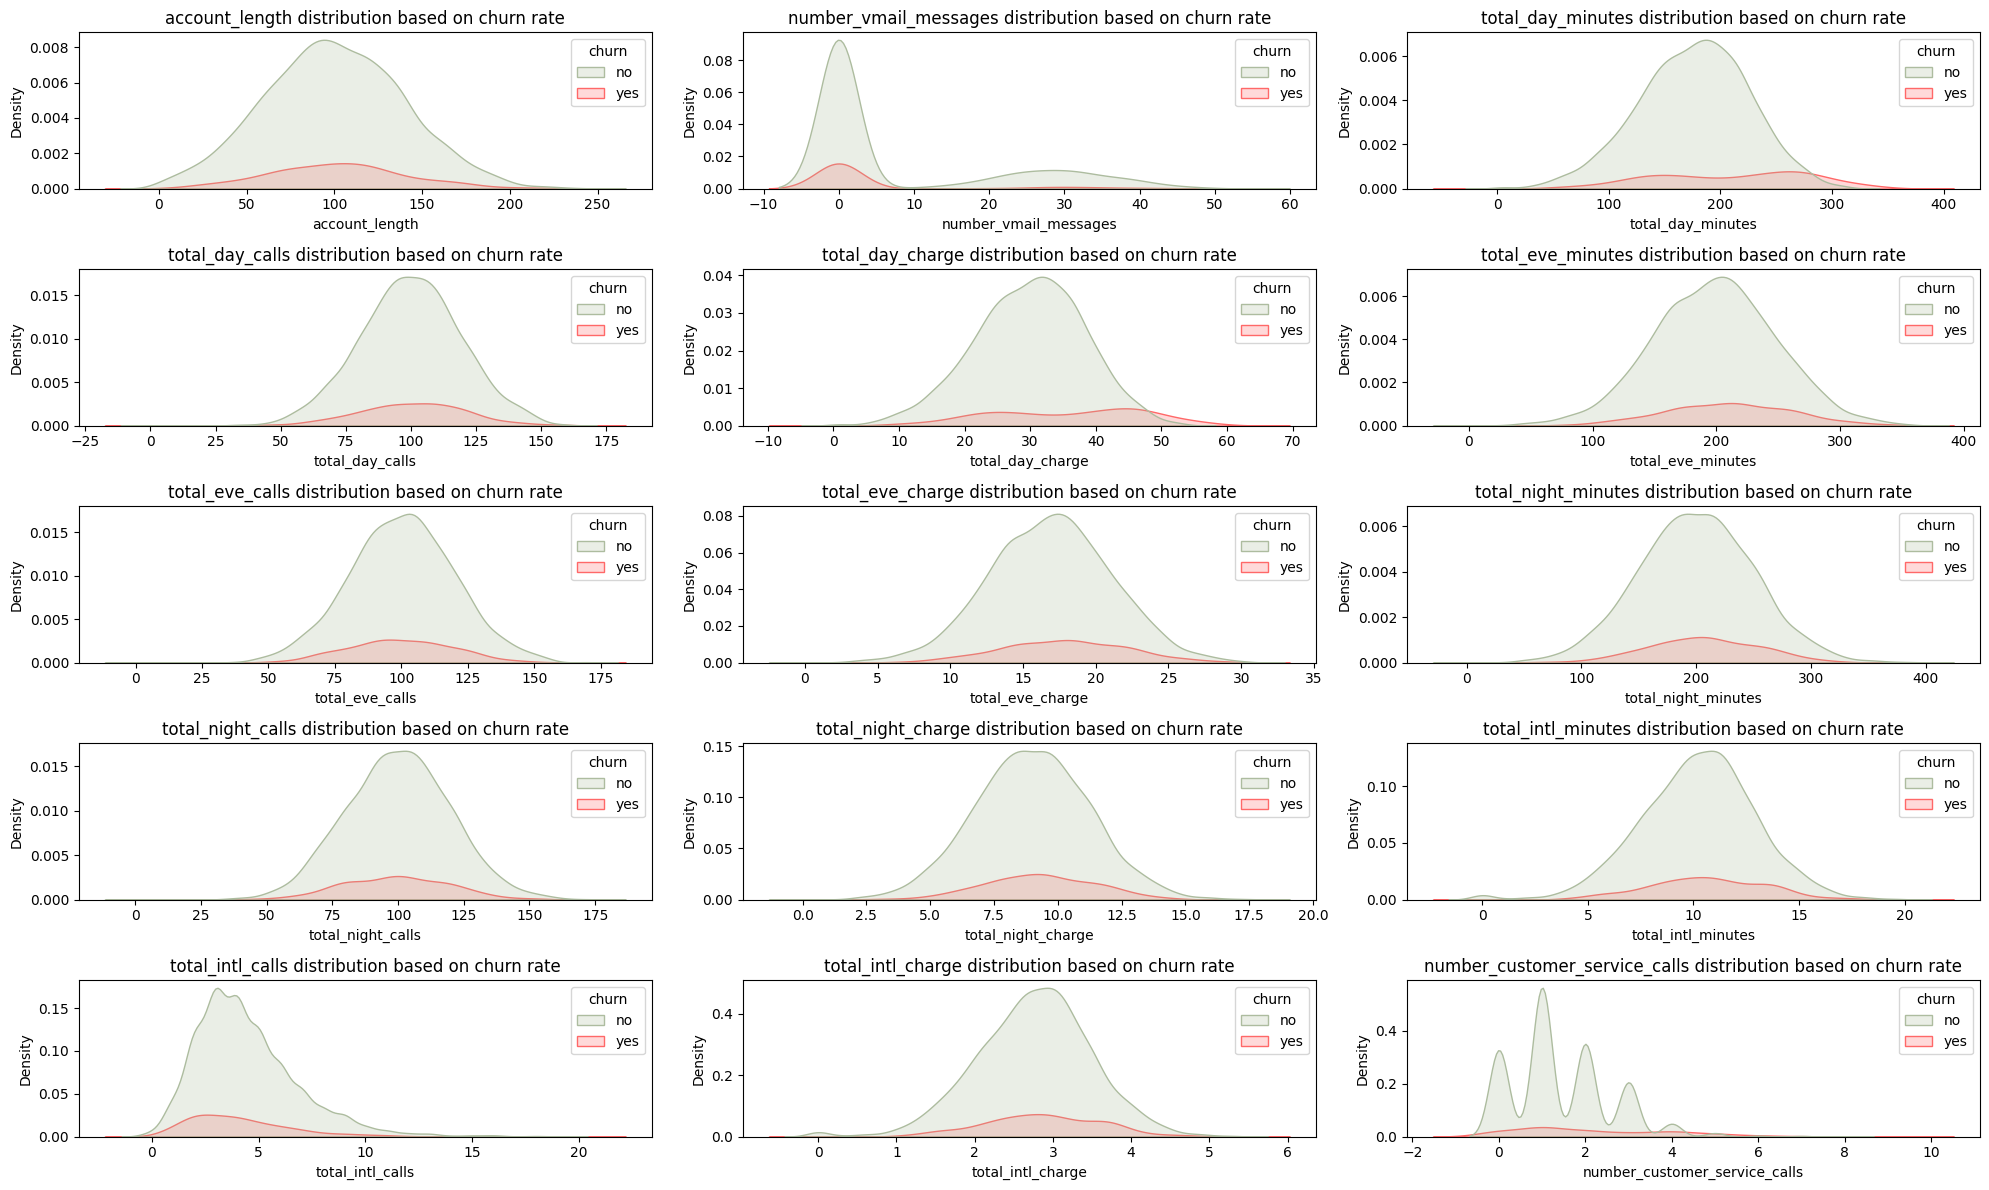

In [ ]:
plt.figure(figsize=(20, 12))
for i, column in enumerate(numeric):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(data=df, x=column, hue='churn', palette=['#ADBC9F', '#FF6868'], fill=True)
    plt.title(f'{column} distribution based on churn rate')
plt.tight_layout()
plt.show()

## Multivariate Analysis

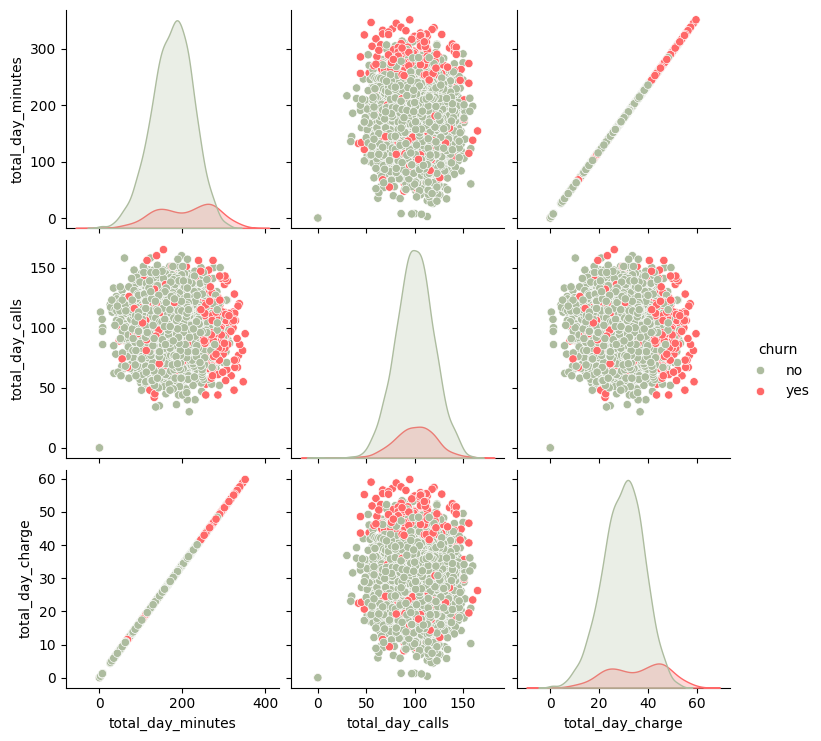

In [ ]:
sns.pairplot(df[['total_day_minutes', 'total_day_calls', 'total_day_charge', 'churn']], hue = 'churn', palette=['#ADBC9F', '#FF6868'])

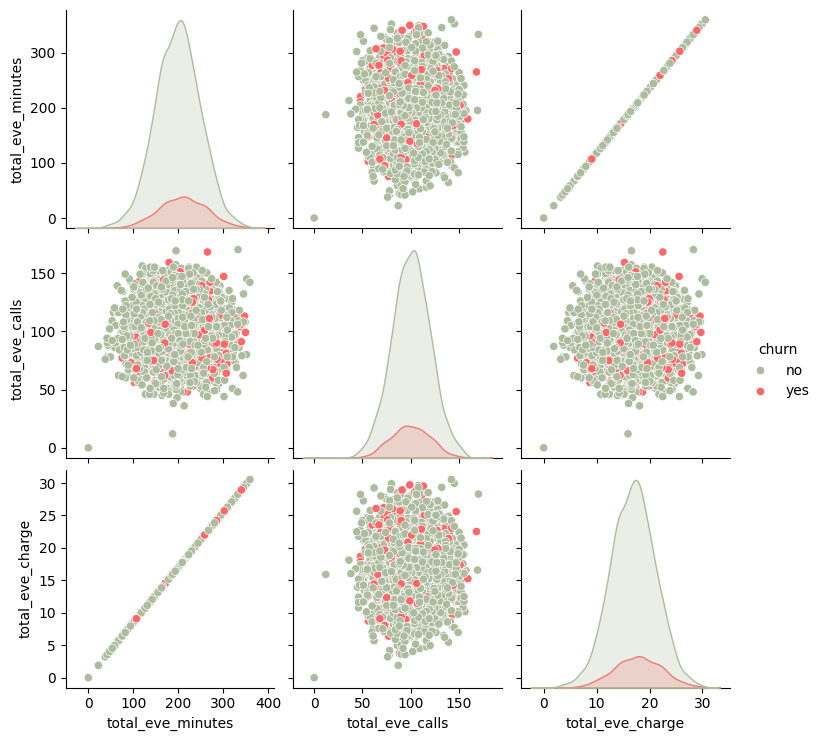

In [ ]:
sns.pairplot(df[['total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'churn']], hue = 'churn', palette=['#ADBC9F', '#FF6868'])

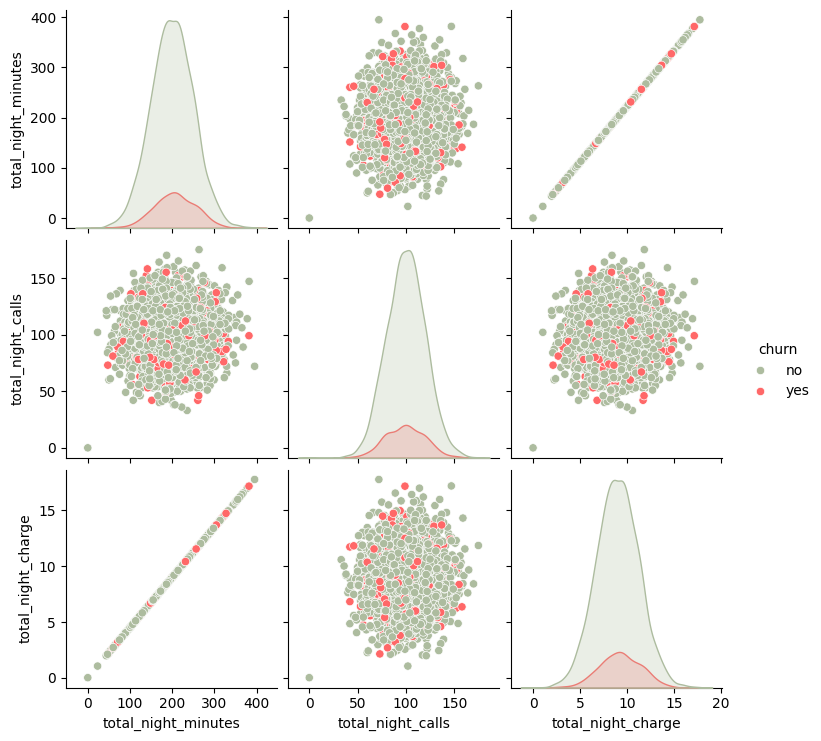

In [ ]:
sns.pairplot(df[['total_night_minutes', 'total_night_calls', 'total_night_charge', 'churn']], hue = 'churn', palette=['#ADBC9F', '#FF6868'])

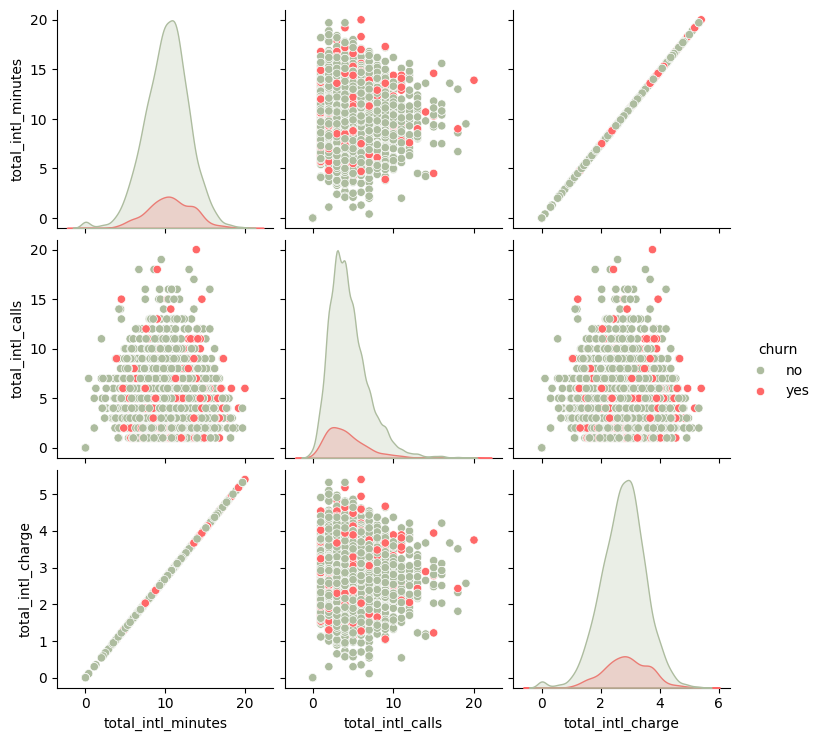

In [ ]:
sns.pairplot(df[['total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'churn']], hue = 'churn', palette=['#ADBC9F', '#FF6868'])

# Data Preprocessing

## Handling Outlier

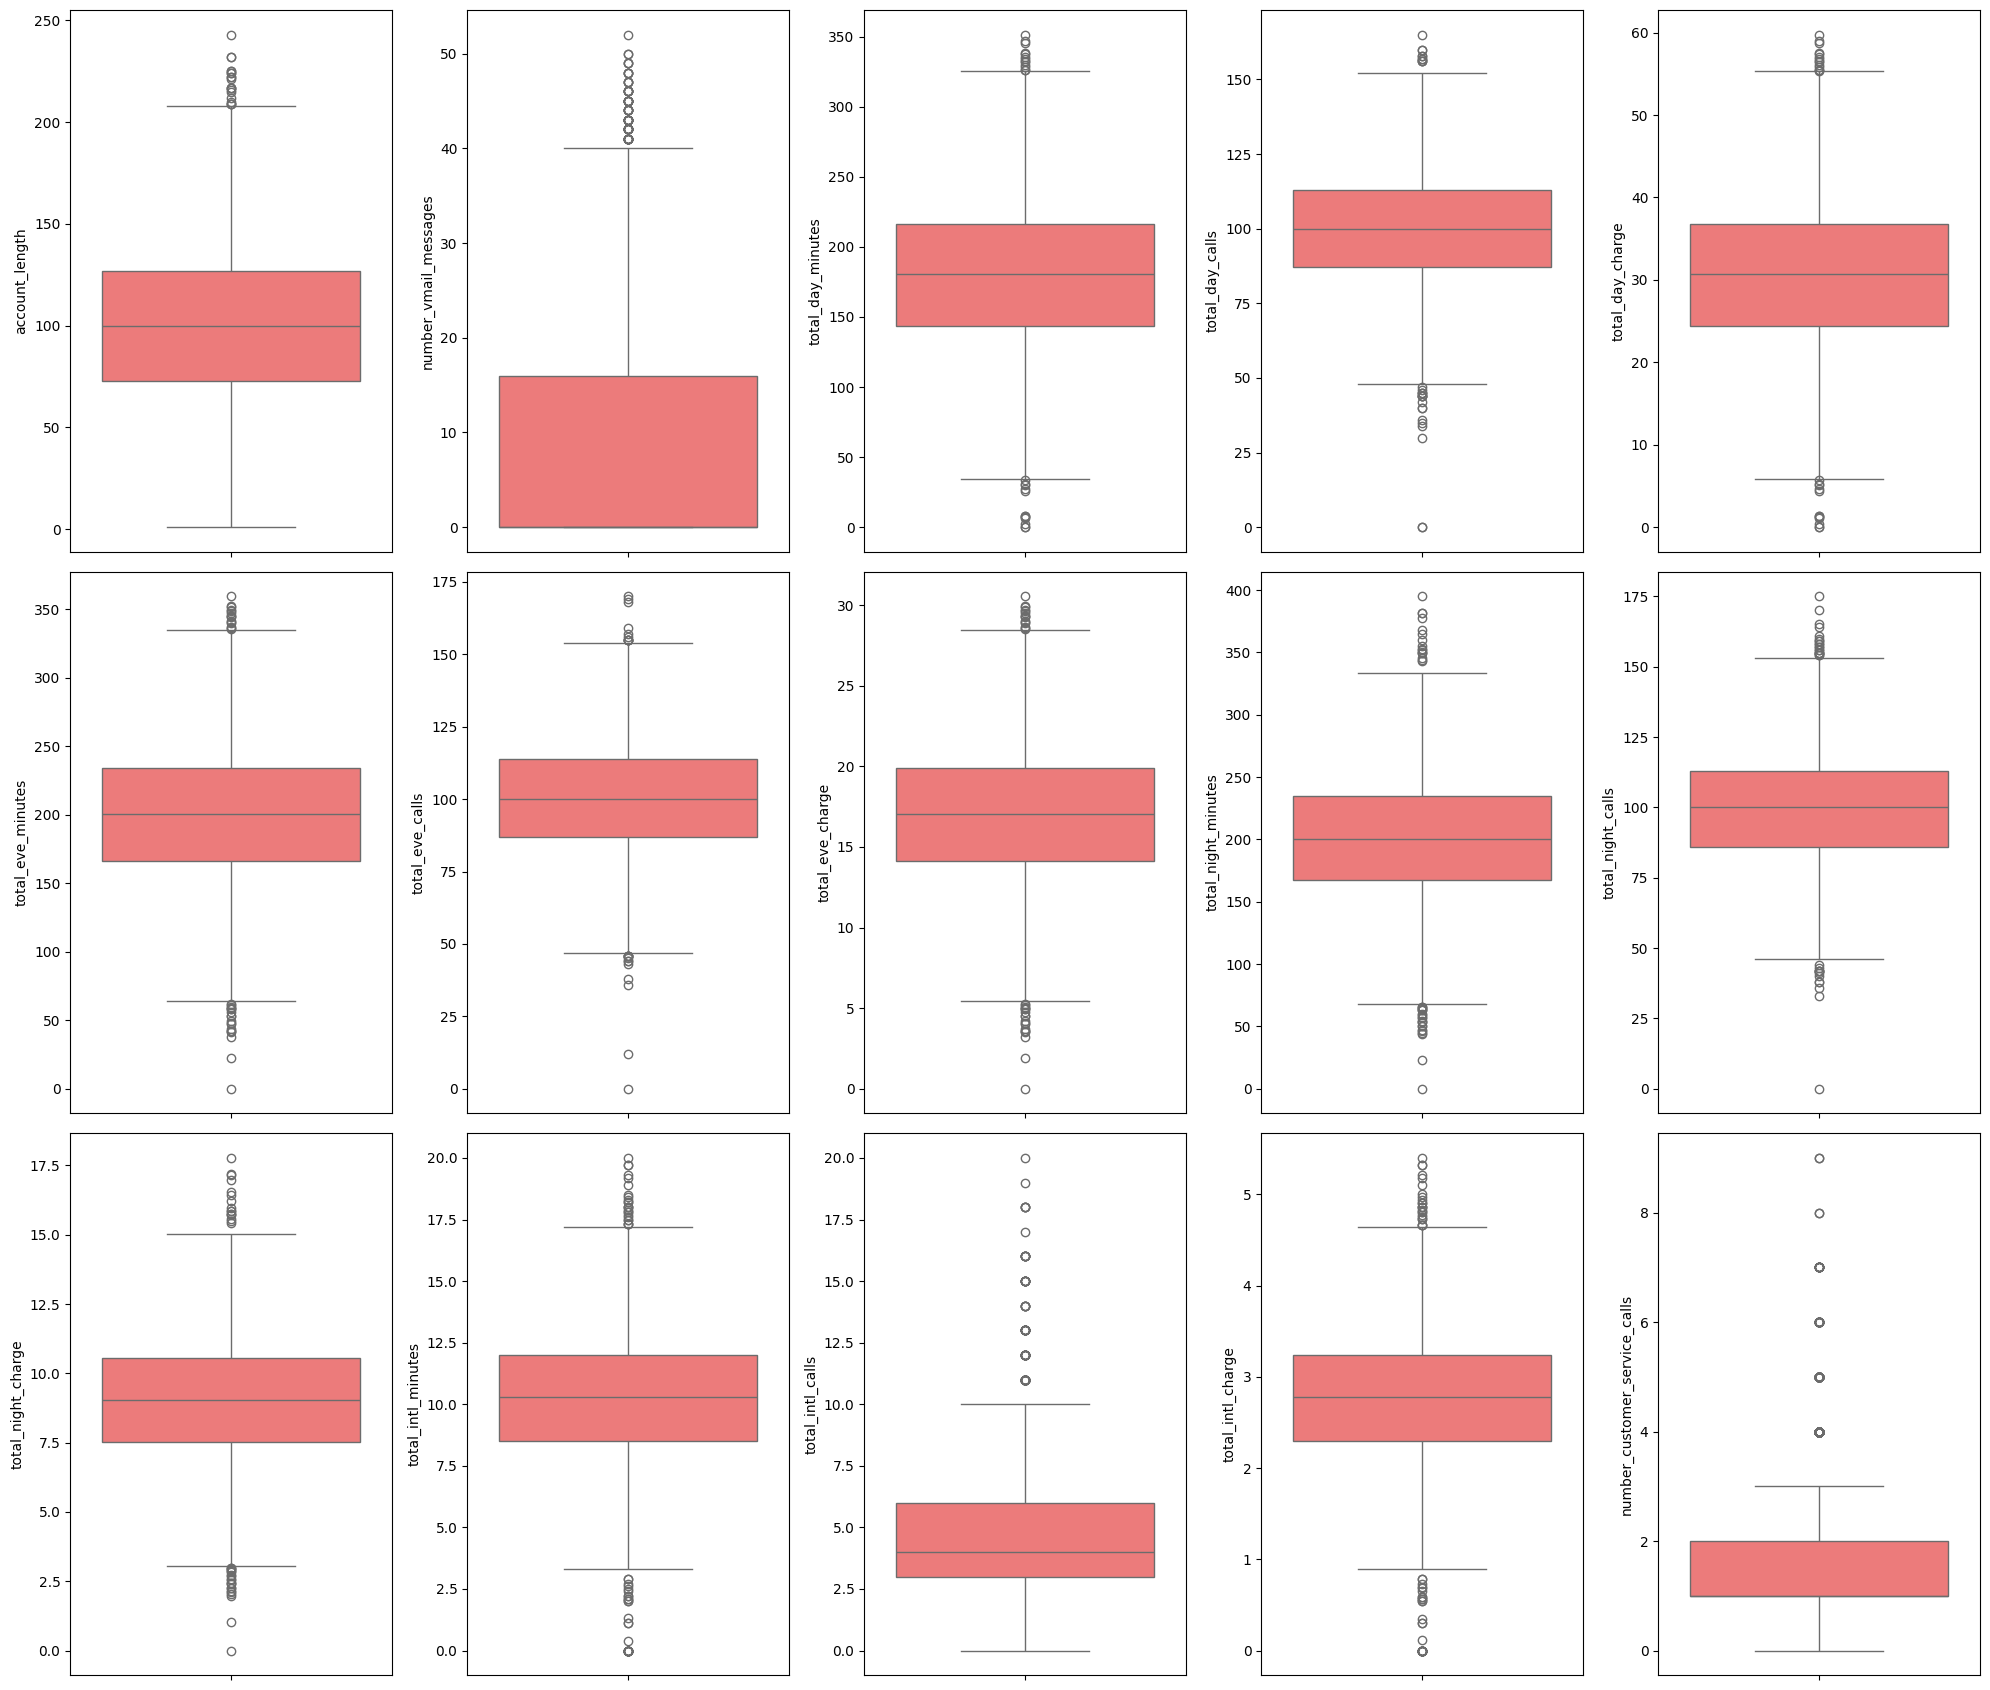

In [ ]:
plt.figure(figsize=(20, 17))
for i in range(1, len(numeric) + 1):
    plt.subplot(3, 5, i)
    sns.boxplot(df[numeric[i - 1]], color='#FF6868')
    plt.tight_layout()

plt.show()

## Feature Encoding

In [ ]:
df_fe = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df_fe.columns:
    if df_fe[col].dtype == 'O':
        df_fe[col] = le.fit_transform(df_fe[col])

In [ ]:
df_fe.sample(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
3636,35,49,0,0,0,0,202.3,105,34.39,195.4,131,16.61,190.1,88,8.55,9.0,2,2.43,3,1
478,6,72,0,0,1,21,186.7,108,31.74,335.0,86,28.48,187.2,119,8.42,16.5,4,4.46,1,0
3040,38,167,1,1,0,0,181.2,122,30.80,262.5,77,22.31,214.0,88,9.63,8.4,4,2.27,0,0
3991,19,66,0,0,0,0,128.2,109,21.79,274.5,112,23.33,211.0,90,9.49,8.1,4,2.19,0,0
2977,18,140,1,0,1,27,176.0,141,29.92,201.3,143,17.11,167.9,93,7.56,7.1,5,1.92,3,0


## Feature Selection

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

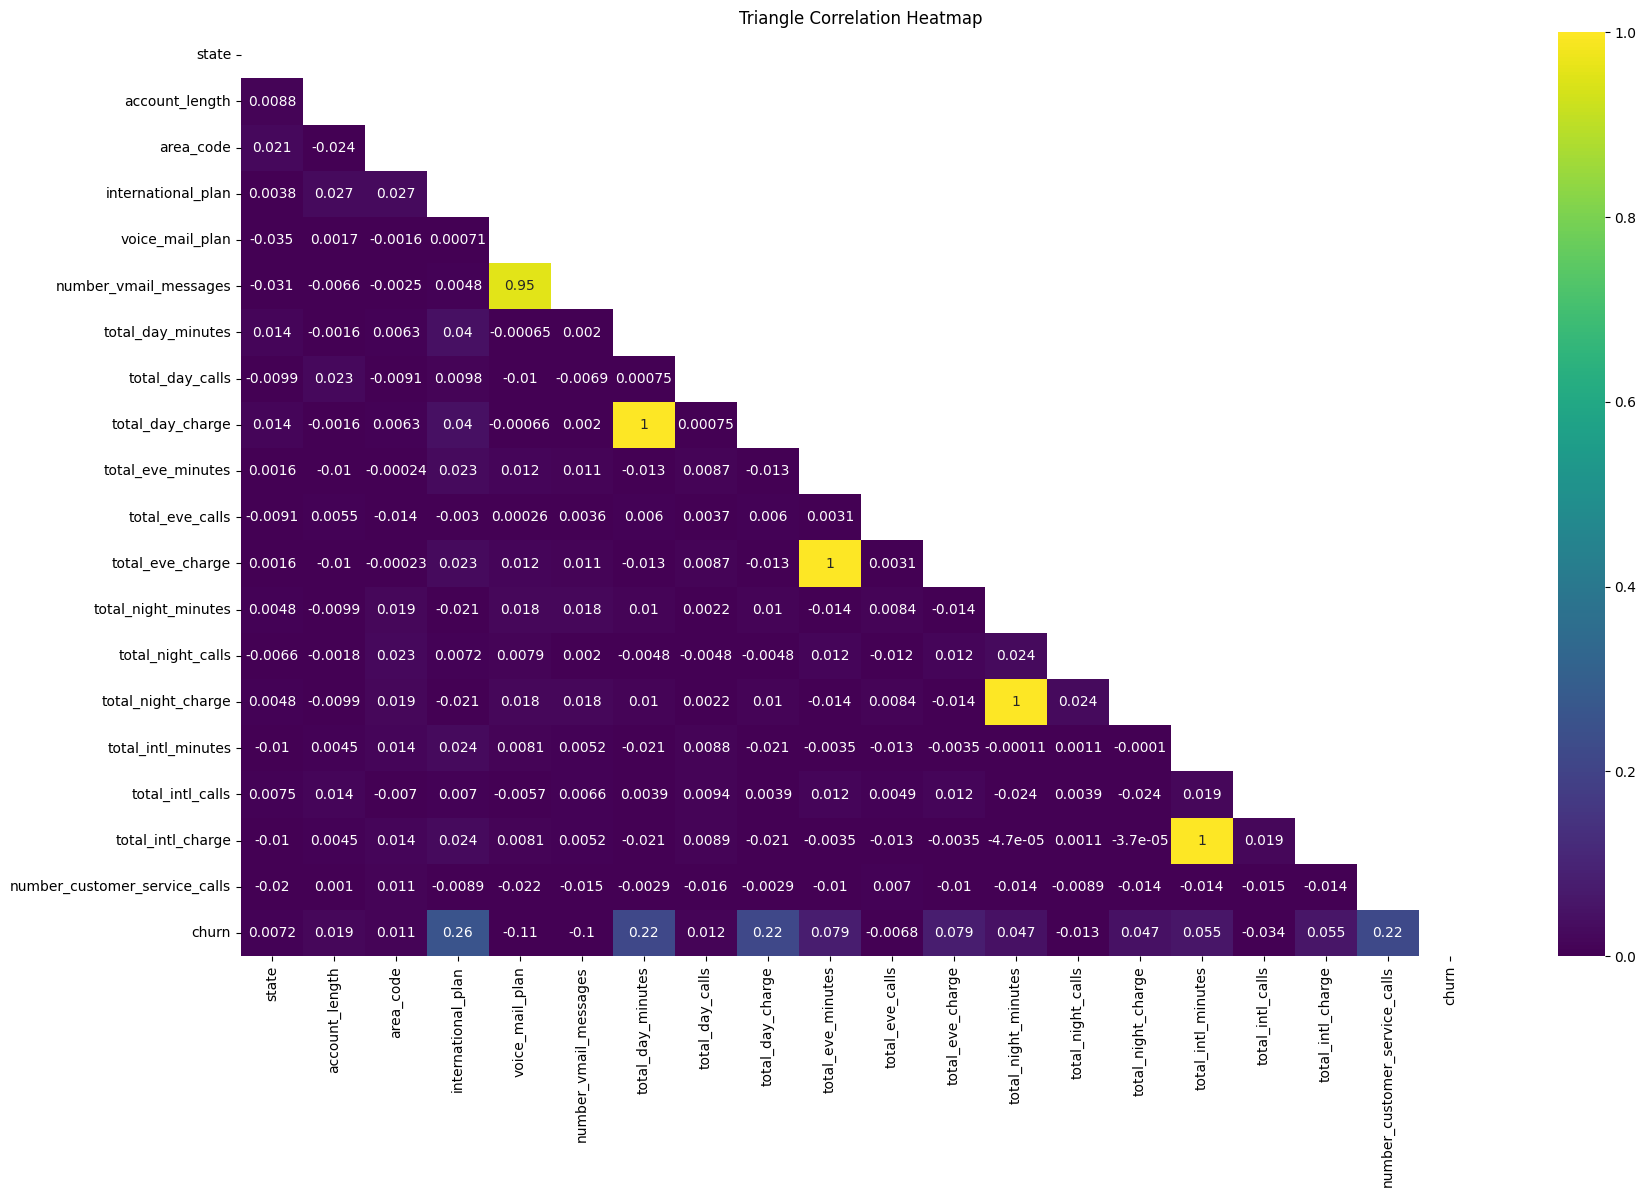

In [ ]:
plt.figure(figsize=(20, 12))
corr = df_fe.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
heatmap = sns.heatmap(corr, mask = mask, vmin = 0, vmax = 1, annot = True, cmap = 'viridis')
heatmap.set_title('Triangle Correlation Heatmap')

In [ ]:
df_fe.corr().abs()['churn'].sort_values(ascending=False)

churn                            1.000000
international_plan               0.259053
number_customer_service_calls    0.221220
total_day_minutes                0.215272
total_day_charge                 0.215263
voice_mail_plan                  0.114643
number_vmail_messages            0.100347
total_eve_minutes                0.078855
total_eve_charge                 0.078852
total_intl_minutes               0.055186
total_intl_charge                0.055177
total_night_minutes              0.046647
total_night_charge               0.046641
total_intl_calls                 0.034334
account_length                   0.019378
total_night_calls                0.012699
total_day_calls                  0.011640
area_code                        0.010696
state                            0.007181
total_eve_calls                  0.006817
Name: churn, dtype: float64

# Modeling

In [ ]:
df_model = df_fe.copy()

In [ ]:
df_model

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,19,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,26,83,1,0,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0
4246,49,73,0,0,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0
4247,27,75,0,0,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0
4248,11,50,0,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0


In [ ]:
X = df_model.drop(columns='churn').copy()
y = df_model['churn'].copy()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape, X_test.shape)

(3400, 19) (850, 19)


In [ ]:
y_train.value_counts()

0    2910
1     490
Name: churn, dtype: int64

## Standarization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Experiment Model

## Logistic Regression

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

kfold1 = model_selection.KFold(n_splits=10,shuffle = True, random_state=42)
lr = LogisticRegression(random_state=42, class_weight='balanced')
lr_model = model_selection.cross_val_score(lr, X, y, cv=kfold1, scoring= 'recall')
print('Recall:', lr_model.mean().round(4))
print('Std:', lr_model.std().round(4))

Recall: 0.7193
Std: 0.0643


## Random Forest Classification

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, class_weight='balanced')
kfold2 = model_selection.KFold(n_splits=10,shuffle = True, random_state=42)
rf_model = model_selection.cross_val_score(rf, X, y, cv=kfold2, scoring= 'recall')
print('Recall Mean:', rf_model.mean().round(4))
print('Std:', rf_model.std().round(4))

Recall Mean: 0.7071
Std: 0.0568


## K-Nearest Neighbors

In [ ]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2, weights='distance')
kfold3 = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
knn_model = model_selection.cross_val_score(knn, X, y, cv=kfold3, scoring='recall')
print('Recall Mean:', np.mean(knn_model).round(4))
print('Std:', np.std(knn_model).round(4))

Recall Mean: 0.3605
Std: 0.06


## XGBOOST

In [ ]:
from sklearn import model_selection
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
kfold4 = model_selection.KFold(n_splits=10,shuffle = True, random_state=42)
xgb_model = model_selection.cross_val_score(xgb, X, y, cv=kfold4, scoring= 'recall')
print('Recall Mean:', xgb_model.mean().round(4))
print('Std:', xgb_model.std().round(4))

Recall Mean: 0.7729
Std: 0.0529


## SVC

In [ ]:
from sklearn import model_selection
from sklearn.svm import SVC

svc = SVC(random_state=42, class_weight='balanced')
kfold5 = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
svc_model = model_selection.cross_val_score(svc, X, y, cv=kfold5, scoring='recall')
print('Recall Mean:', svc_model.mean().round(4))
print('Std:', svc_model.std().round(4))

Recall Mean: 0.4784
Std: 0.0643


# Hyperparameter Tuning

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, GridSearchCV

## Logistic Regression

In [ ]:
params ={'C': [0.1, 1, 10, 100],
         'penalty': ['l1', 'l2'],
         'solver': ['liblinear', 'saga'] }

model = LogisticRegression(random_state=42)
kfold6 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search1 = GridSearchCV(model, param_grid=params, scoring='recall', cv=kfold6)
grid_search1.fit(X_train, y_train)

print('Best parameters: ', grid_search1.best_params_)

Best parameters:  {'C': 1, 'penalty': 'l2', 'solver': 'saga'}


In [ ]:
y_pred = grid_search1.predict(X_test)

y_pred_proba = grid_search1.predict_proba(X_test)
y_pred_proba_train = grid_search1.predict_proba(X_train)

report = (classification_report(y_test, y_pred))

rtest = roc_auc_score(y_test, y_pred_proba[:, 1])
rtrain = roc_auc_score(y_train, y_pred_proba_train[:, 1])

auc = roc_auc_score(y_test, y_pred)

print('MODEL EVALUATION :\n', report)
print('-' * 55, '\n')
print('AUC Test score:', rtest.round(4))
print('AUC Train scores:', rtrain.round(4))

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       742
           1       0.60      0.22      0.32       108

    accuracy                           0.88       850
   macro avg       0.75      0.60      0.63       850
weighted avg       0.86      0.88      0.86       850

------------------------------------------------------- 

AUC Test score: 0.8436
AUC Train scores: 0.8279


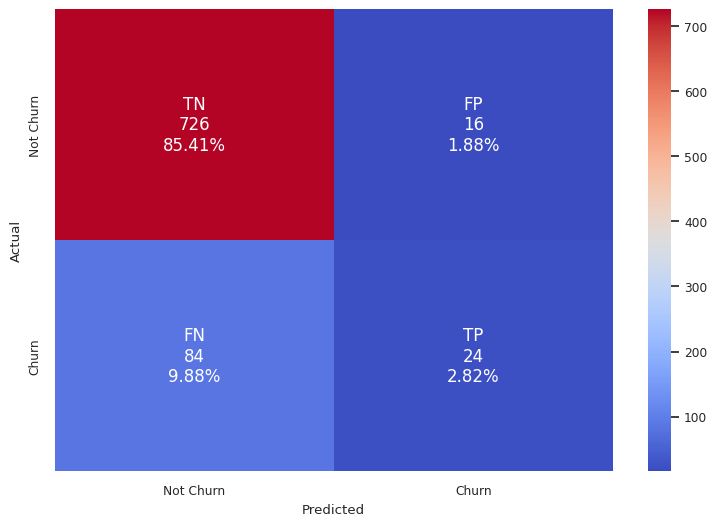

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(9,6))
sns.set(font_scale=0.8)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm', annot_kws={'size': 12},
            yticklabels=['Not Churn','Churn'], xticklabels=['Not Churn','Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


## Random Forest Classification

In [ ]:
params ={'n_estimators': [100, 200, 300],
         'max_depth': [5, 10, 20],
         'min_samples_split': [2, 5, 10],
         'min_samples_leaf': [1, 2, 4]}

model = RandomForestClassifier(random_state=42, class_weight='balanced')
kfold7 = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
grid_search2 = model_selection.GridSearchCV(model, param_grid = params, scoring = 'recall', cv = kfold7)
grid_search2.fit(X_train, y_train)

print('Best parameters: ', grid_search2.best_params_)

Best parameters:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
y_pred = grid_search2.predict(X_test)

y_pred_proba = grid_search2.predict_proba(X_test)
y_pred_proba_train = grid_search2.predict_proba(X_train)

report = (classification_report(y_test, y_pred))

rtest = roc_auc_score(y_test, y_pred_proba[:, 1])
rtrain = roc_auc_score(y_train, y_pred_proba_train[:, 1])

auc = roc_auc_score(y_test, y_pred)

print('MODEL EVALUATION :\n', report)
print('-' * 55, '\n')
print('AUC Test score:', rtest.round(4))
print('AUC Train scores:', rtrain.round(4))

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       742
           1       0.79      0.80      0.79       108

    accuracy                           0.95       850
   macro avg       0.88      0.88      0.88       850
weighted avg       0.95      0.95      0.95       850

------------------------------------------------------- 

AUC Test score: 0.9242
AUC Train scores: 0.9435


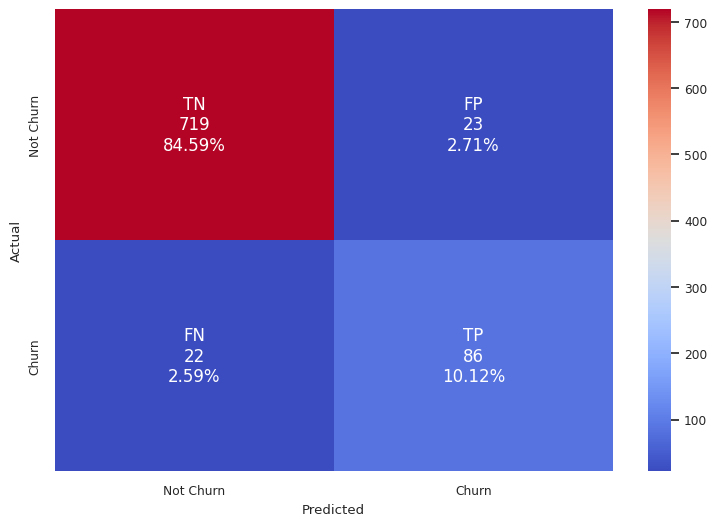

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(9,6))
sns.set(font_scale=0.8)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm', annot_kws={'size': 12},
            yticklabels=['Not Churn','Churn'], xticklabels=['Not Churn','Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## K-Nearest Neighbors

In [ ]:
params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

model = KNeighborsClassifier()
kfold8 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search3 = GridSearchCV(model, param_grid=params, scoring='recall', cv=kfold8)
grid_search3.fit(X_train, y_train)

print('Best parameters:', grid_search3.best_params_)

Best parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}


In [ ]:
y_pred = grid_search3.predict(X_test)

y_pred_proba = grid_search3.predict_proba(X_test)
y_pred_proba_train = grid_search3.predict_proba(X_train)

report = (classification_report(y_test, y_pred))

rtest = roc_auc_score(y_test, y_pred_proba[:, 1])
rtrain = roc_auc_score(y_train, y_pred_proba_train[:, 1])

auc = roc_auc_score(y_test, y_pred)

print('MODEL EVALUATION :\n', report)
print('-' * 55, '\n')
print('AUC Test score:', rtest.round(4))
print('AUC Train scores:', rtrain.round(4))

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       742
           1       0.72      0.38      0.50       108

    accuracy                           0.90       850
   macro avg       0.82      0.68      0.72       850
weighted avg       0.89      0.90      0.89       850

------------------------------------------------------- 

AUC Test score: 0.8327
AUC Train scores: 0.969


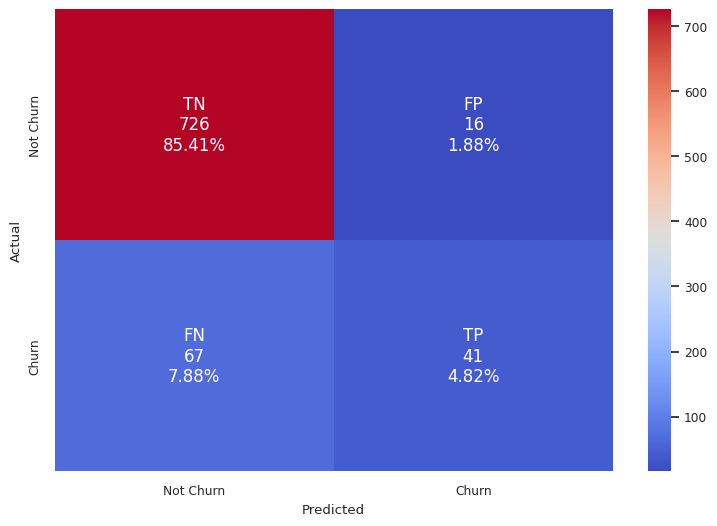

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(9,6))
sns.set(font_scale=0.8)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm', annot_kws={'size': 12},
            yticklabels=['Not Churn','Churn'], xticklabels=['Not Churn','Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## XGBOOST

In [ ]:
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [100, 500, 1000],
    'scale_pos_weight': [5, 10, 15]
}

model = XGBClassifier(random_state=42)
kfold9 = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
grid_search4 = model_selection.GridSearchCV(model, param_grid = params, scoring = 'recall', cv = kfold9)
grid_search4.fit(X_train, y_train)

print('Best parameters: ', grid_search4.best_params_)

Best parameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 15}


In [ ]:
y_pred = grid_search4.predict(X_test)

y_pred_proba = grid_search4.predict_proba(X_test)
y_pred_proba_train = grid_search4.predict_proba(X_train)

report = (classification_report(y_test, y_pred))

rtest = roc_auc_score(y_test, y_pred_proba[:, 1])
rtrain = roc_auc_score(y_train, y_pred_proba_train[:, 1])

auc = roc_auc_score(y_test, y_pred)

print('MODEL EVALUATION :\n', report)
print('-' * 55, '\n')
print('AUC Test score:', rtest.round(4))
print('AUC Train scores:', rtrain.round(4))

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.97      0.78      0.86       742
           1       0.36      0.84      0.50       108

    accuracy                           0.79       850
   macro avg       0.66      0.81      0.68       850
weighted avg       0.89      0.79      0.82       850

------------------------------------------------------- 

AUC Test score: 0.8629
AUC Train scores: 0.898


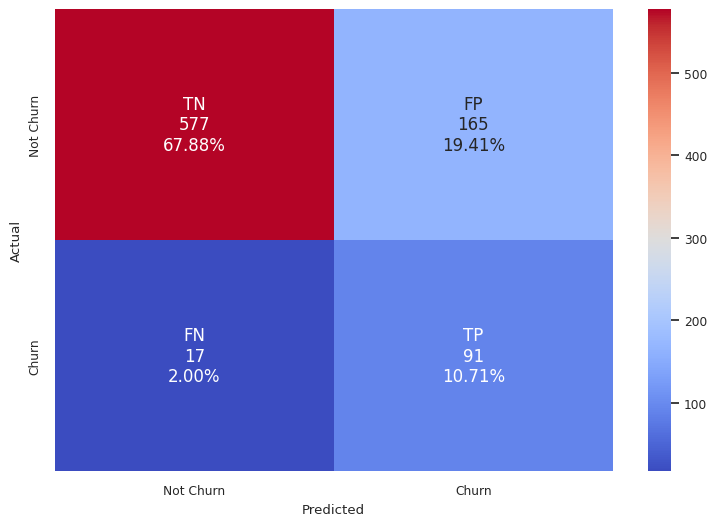

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(9,6))
sns.set(font_scale=0.8)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm', annot_kws={'size': 12},
            yticklabels=['Not Churn','Churn'], xticklabels=['Not Churn','Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## SVC

In [ ]:
params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced']
}

model = SVC(random_state=42,  probability=True)
kfold10 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search5 = GridSearchCV(model, param_grid=params, scoring='recall', cv=kfold10)
grid_search5.fit(X_train, y_train)

print('Best parameters:', grid_search5.best_params_)

Best parameters: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
y_pred = grid_search5.predict(X_test)

y_pred_proba = grid_search5.predict_proba(X_test)
y_pred_proba_train = grid_search5.predict_proba(X_train)

report = (classification_report(y_test, y_pred))

rtest = roc_auc_score(y_test, y_pred_proba[:, 1])
rtrain = roc_auc_score(y_train, y_pred_proba_train[:, 1])

auc = roc_auc_score(y_test, y_pred)

print('MODEL EVALUATION :\n', report)
print('-' * 55, '\n')
print('AUC Test score:', rtest.round(4))
print('AUC Train scores:', rtrain.round(4))

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.98      0.84      0.90       742
           1       0.44      0.87      0.59       108

    accuracy                           0.84       850
   macro avg       0.71      0.85      0.74       850
weighted avg       0.91      0.84      0.86       850

------------------------------------------------------- 

AUC Test score: 0.9141
AUC Train scores: 0.9112


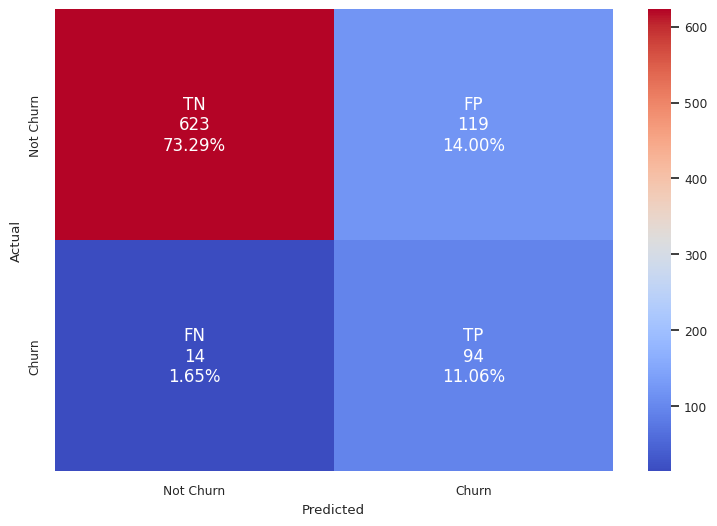

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(9,6))
sns.set(font_scale=0.8)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm', annot_kws={'size': 12},
            yticklabels=['Not Churn','Churn'], xticklabels=['Not Churn','Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Predict Test Set

In [ ]:
url = "https://drive.google.com/file/d/1AavX2Ig2Yo7PHCqmnY08PC_SSwM9-DZp/view?usp=sharing"
file_id = url.split("/")[-2]
Data_Test = f"https://drive.google.com/uc?id={file_id}"

In [ ]:
Data_Test = pd.read_csv(Data_Test)
Data_Test.head(10)

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
5,6,IL,142,area_code_415,no,no,0,84.8,95,14.42,136.7,63,11.62,250.5,148,11.27,14.2,6,3.83,2
6,7,LA,172,area_code_408,no,no,0,212.0,121,36.04,31.2,115,2.65,293.3,78,13.20,12.6,10,3.40,3
7,8,GA,72,area_code_415,no,yes,37,220.0,80,37.40,217.3,102,18.47,152.8,71,6.88,14.7,6,3.97,3
8,9,NJ,149,area_code_408,no,no,0,140.4,94,23.87,271.8,92,23.10,188.3,108,8.47,11.1,9,3.00,1
9,10,ID,119,area_code_415,no,no,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5


In [ ]:
Data_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [ ]:
list_feature = []
for col in Data_Test:
    list_feature.append([col, Data_Test[col].dtype, Data_Test[col].isna().sum(), Data_Test[col].nunique(),Data_Test[col].unique()[:5]])

Data_Test_info = pd.DataFrame(data=list_feature, columns='colums, datatype, null_values, unique_values, unique_sample'.split(","))
Data_Test_info

,colums,datatype,null_values,unique_values,unique_sample
0,id,int64,0,750,"[1, 2, 3, 4, 5]"
1,state,object,0,51,"[KS, AL, IA, VT, NE]"
2,account_length,int64,0,175,"[128, 118, 62, 93, 174]"
3,area_code,object,0,3,"[area_code_415, area_code_510, area_code_408]"
4,international_plan,object,0,2,"[no, yes]"
5,voice_mail_plan,object,0,2,"[yes, no]"
6,number_vmail_messages,int64,0,39,"[25, 0, 37, 33, 32]"
7,total_day_minutes,float64,0,619,"[265.1, 223.4, 120.7, 190.7, 124.3]"
8,total_day_calls,int64,0,100,"[110, 98, 70, 114, 76]"
9,total_day_charge,float64,0,619,"[45.07, 37.98, 20.52, 32.42, 21.13]"


In [ ]:
numeric = [col for col in Data_Test.columns if Data_Test[col].dtype != object]
categorical = [col for col in Data_Test.columns if Data_Test[col].dtype == object]

print("Numeric features:", numeric)
print("Categorical features:", categorical)
print(f"Total numeric features: {len(numeric)}")
print(f"Total categorical features: {len(categorical)}")

Numeric features: ['id', 'account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']
Categorical features: ['state', 'area_code', 'international_plan', 'voice_mail_plan']
Total numeric features: 16
Total categorical features: 4


In [ ]:
Data_Test.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
id,750.0,375.500,216.651,1.00,188.250,375.500,562.750,750.00
account_length,750.0,100.385,39.699,1.00,74.000,101.000,126.000,238.00
number_vmail_messages,750.0,8.455,14.124,0.00,0.000,0.000,21.000,51.00
total_day_minutes,750.0,180.455,53.258,12.50,146.625,178.200,215.975,350.80
total_day_calls,750.0,100.721,19.719,39.00,88.000,101.000,114.000,163.00
total_day_charge,750.0,30.678,9.054,2.13,24.925,30.295,36.715,59.64
total_eve_minutes,750.0,203.258,52.185,31.20,166.800,203.350,235.975,363.70
total_eve_calls,750.0,100.273,19.368,37.00,87.000,101.000,113.000,164.00
total_eve_charge,750.0,17.277,4.436,2.65,14.178,17.285,20.057,30.91
total_night_minutes,750.0,199.619,51.531,50.90,164.475,199.450,234.800,364.30


## Handling Ourlier Data Test

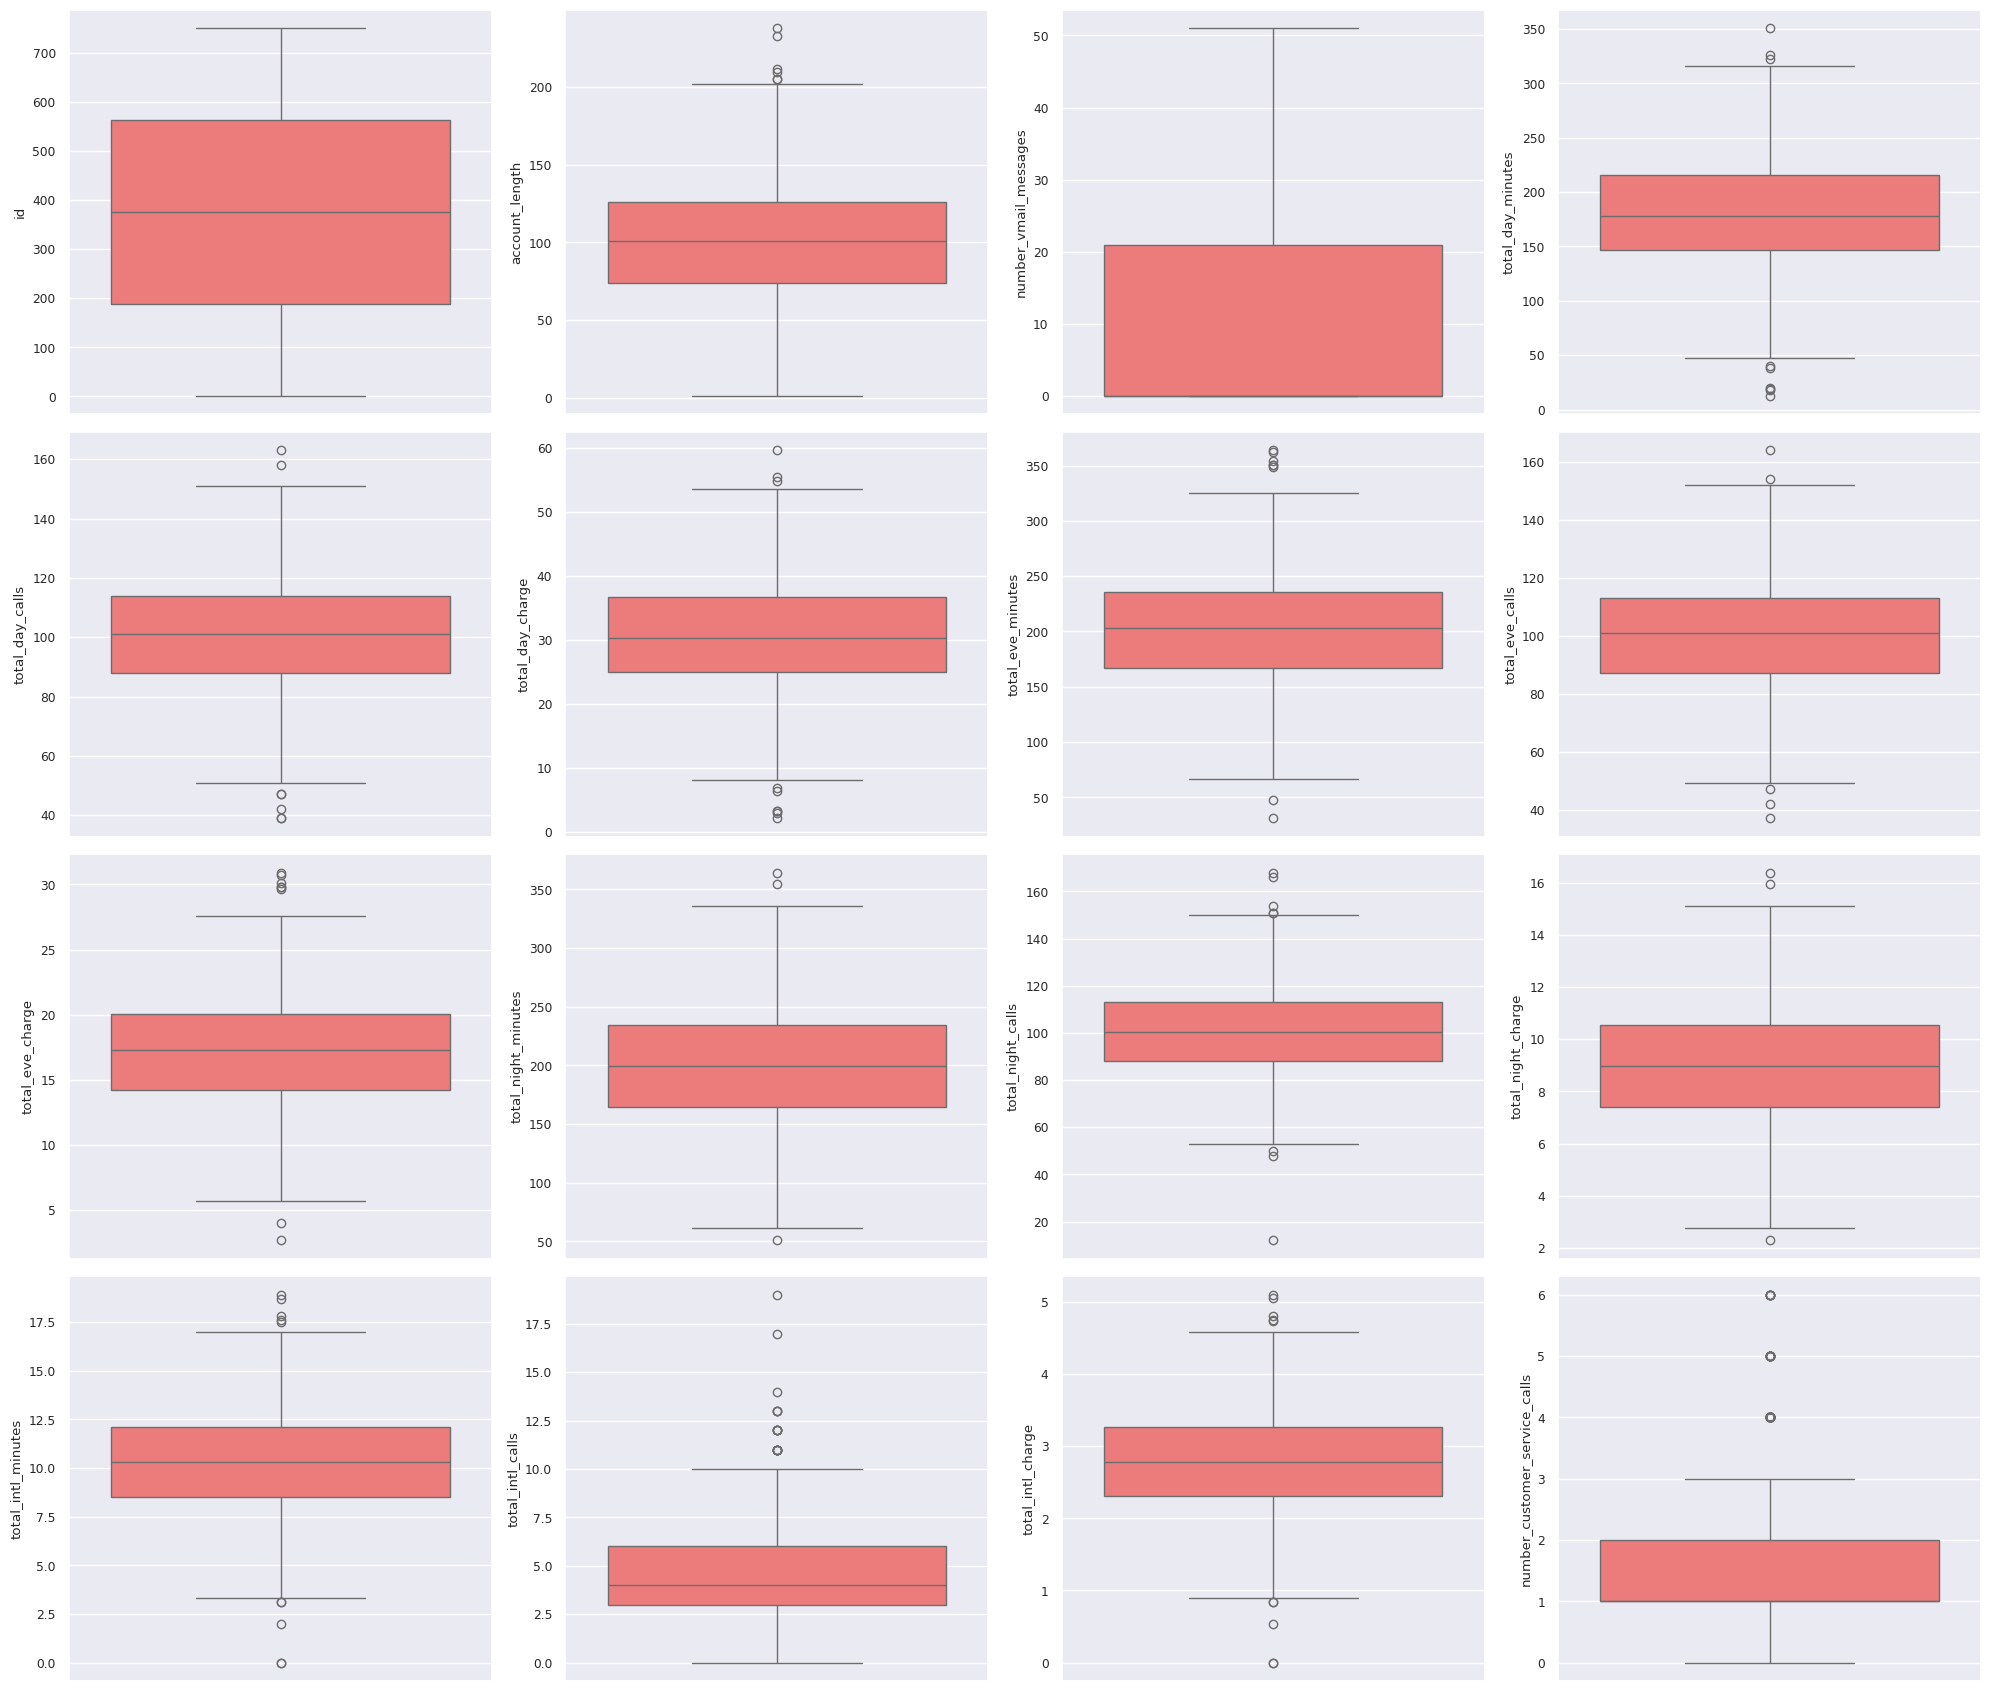

In [ ]:
plt.figure(figsize=(20, 17))
for i in range(1, len(numeric) + 1):
    plt.subplot(4, 4, i)
    sns.boxplot(Data_Test[numeric[i - 1]], color='#FF6868')
    plt.tight_layout()

plt.show()

## Feature Enconding Data Test

In [ ]:
Data_Test_fe = Data_Test.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in Data_Test_fe.columns:
    if Data_Test_fe[col].dtype == 'O':
        Data_Test_fe[col] = le.fit_transform(Data_Test_fe[col])

In [ ]:
Data_Test_fe

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,16,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,1,118,2,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,12,62,1,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,46,93,2,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,29,174,1,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,10,130,1,0,0,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,747,47,73,0,0,0,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,748,49,152,1,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,749,7,61,1,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


In [ ]:
# drop id
Data_Test_id = Data_Test_fe.copy()

In [ ]:
Data_Test_id = Data_Test_id.drop(columns='id')

In [ ]:
Data_Test_id

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,16,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,1,118,2,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,12,62,1,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,46,93,2,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,29,174,1,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,10,130,1,0,0,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,47,73,0,0,0,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,49,152,1,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,7,61,1,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


In [ ]:
data_test_to_predict = Data_Test_id
Data_Test["predicted_Churn"] = grid_search2.predict(data_test_to_predict)

In [ ]:
Data_Test

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,predicted_Churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,1
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,...,76,26.11,203.0,99,9.14,13.1,6,3.54,4,1
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,...,111,18.55,129.6,121,5.83,8.1,3,2.19,3,1
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,...,112,23.55,250.7,115,11.28,15.5,5,4.19,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,...,97,19.24,202.7,111,9.12,11.3,7,3.05,0,1
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,...,84,22.99,241.8,112,10.88,12.3,2,3.32,3,1
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,1


In [ ]:
counts_predict = Data_Test['predicted_Churn'].value_counts()
counts_predict

1    539
0    211
Name: predicted_Churn, dtype: int64